# Steps:

>
1. data analysis on the data
2. determine the important features, and extract them from the dataset.
3. split the data to train, test datasets [for original_data and extracted features_data]
4. standraize the x_train dataset for both original_data and extract_data.
5. overSample the train datasets using random and SMOTE
6. use machine data models [RandomForest, LogisticRegression, SVM, Adaboost, Xgboost]
7. cost function: recall, precision, f_score, auc
8. compare the results and choose the best one



In [ ]:
import matplotlib.pyplot as plt
 
plt.rcParams.update({
    "lines.color": "white",
    "patch.edgecolor": "white",
    "text.color": "black",
    "axes.facecolor": "white",
    "axes.edgecolor": "lightgray",
    "axes.labelcolor": "white",
    "xtick.color": "white",
    "ytick.color": "white",
    "grid.color": "blue",
    "figure.facecolor": "black",
    "figure.edgecolor": "black",
    "savefig.facecolor": "black",
    "savefig.edgecolor": "black"})

plt.figure(figsize=(10,5))

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

# Data Analysis:

In [ ]:
import pandas as pd
import numpy as np
# download Dataset
!rm -r data/
!gdown --id 1ml7ZGeaTNYoiGubT5vRHWIFSD2S9jcso

# https://drive.google.com/uc?export=download&id=1ml7ZGeaTNYoiGubT5vRHWIFSD2S9jcso
#save Dataset to dataframe
data = pd.read_csv('creditcard.csv')

rm: cannot remove 'data/': No such file or directory
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1ml7ZGeaTNYoiGubT5vRHWIFSD2S9jcso
To: /content/creditcard.csv
100% 151M/151M [00:05<00:00, 26.9MB/s]


In [ ]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [ ]:
data.shape

(284807, 31)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

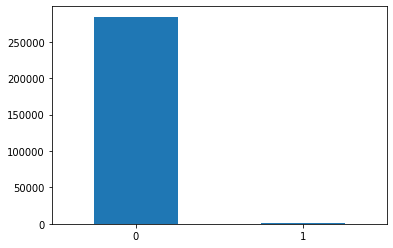

In [ ]:
 
count_classes =pd.value_counts(data['Class'],sort =True)
count_classes.plot(kind='bar',rot=0)

 

## Search for the important features:

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

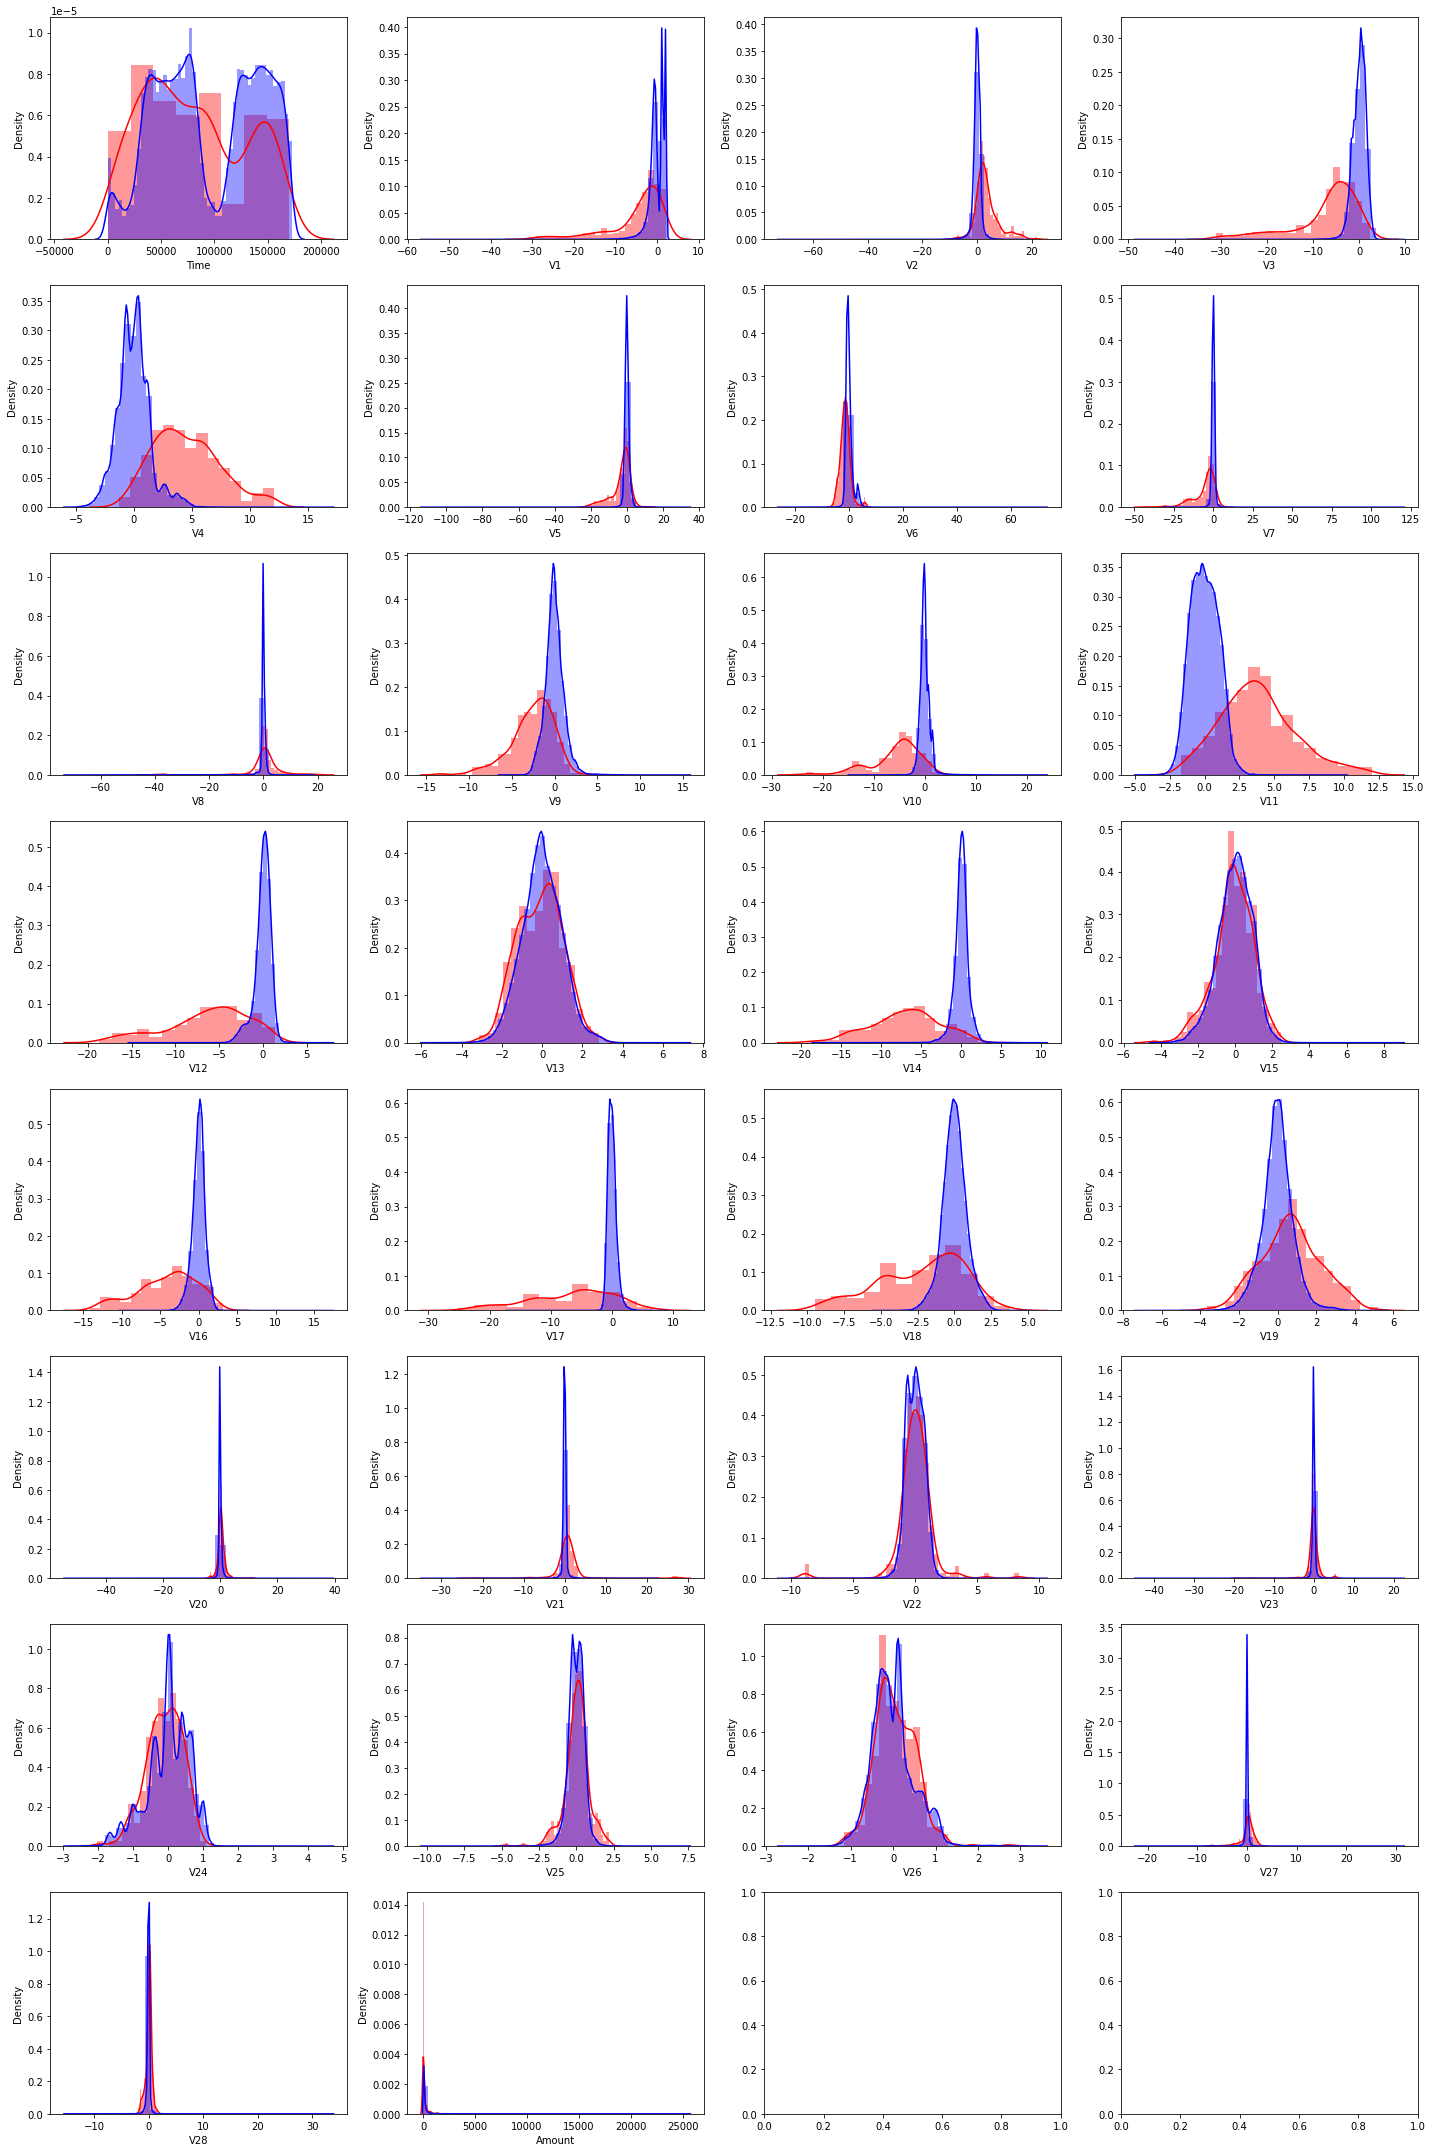

In [ ]:
data_fraud_parameter =data.drop(['Class'],axis=1)

fig, ax=plt.subplots(ncols=4, nrows=8,figsize=(20,30))

ax=ax.flatten()

for i, col in enumerate(data_fraud_parameter):
  sns.distplot(data_fraud_parameter[col].loc[data['Class']==1],ax=ax[i],color='red')
  sns.distplot(data_fraud_parameter[col].loc[data['Class']==0],ax=ax[i],color='blue')
  

plt.tight_layout()

 


improtant features according to figures:
v3,v4,v9,v10,v11,v12,v14,v16,v17,v18.
 


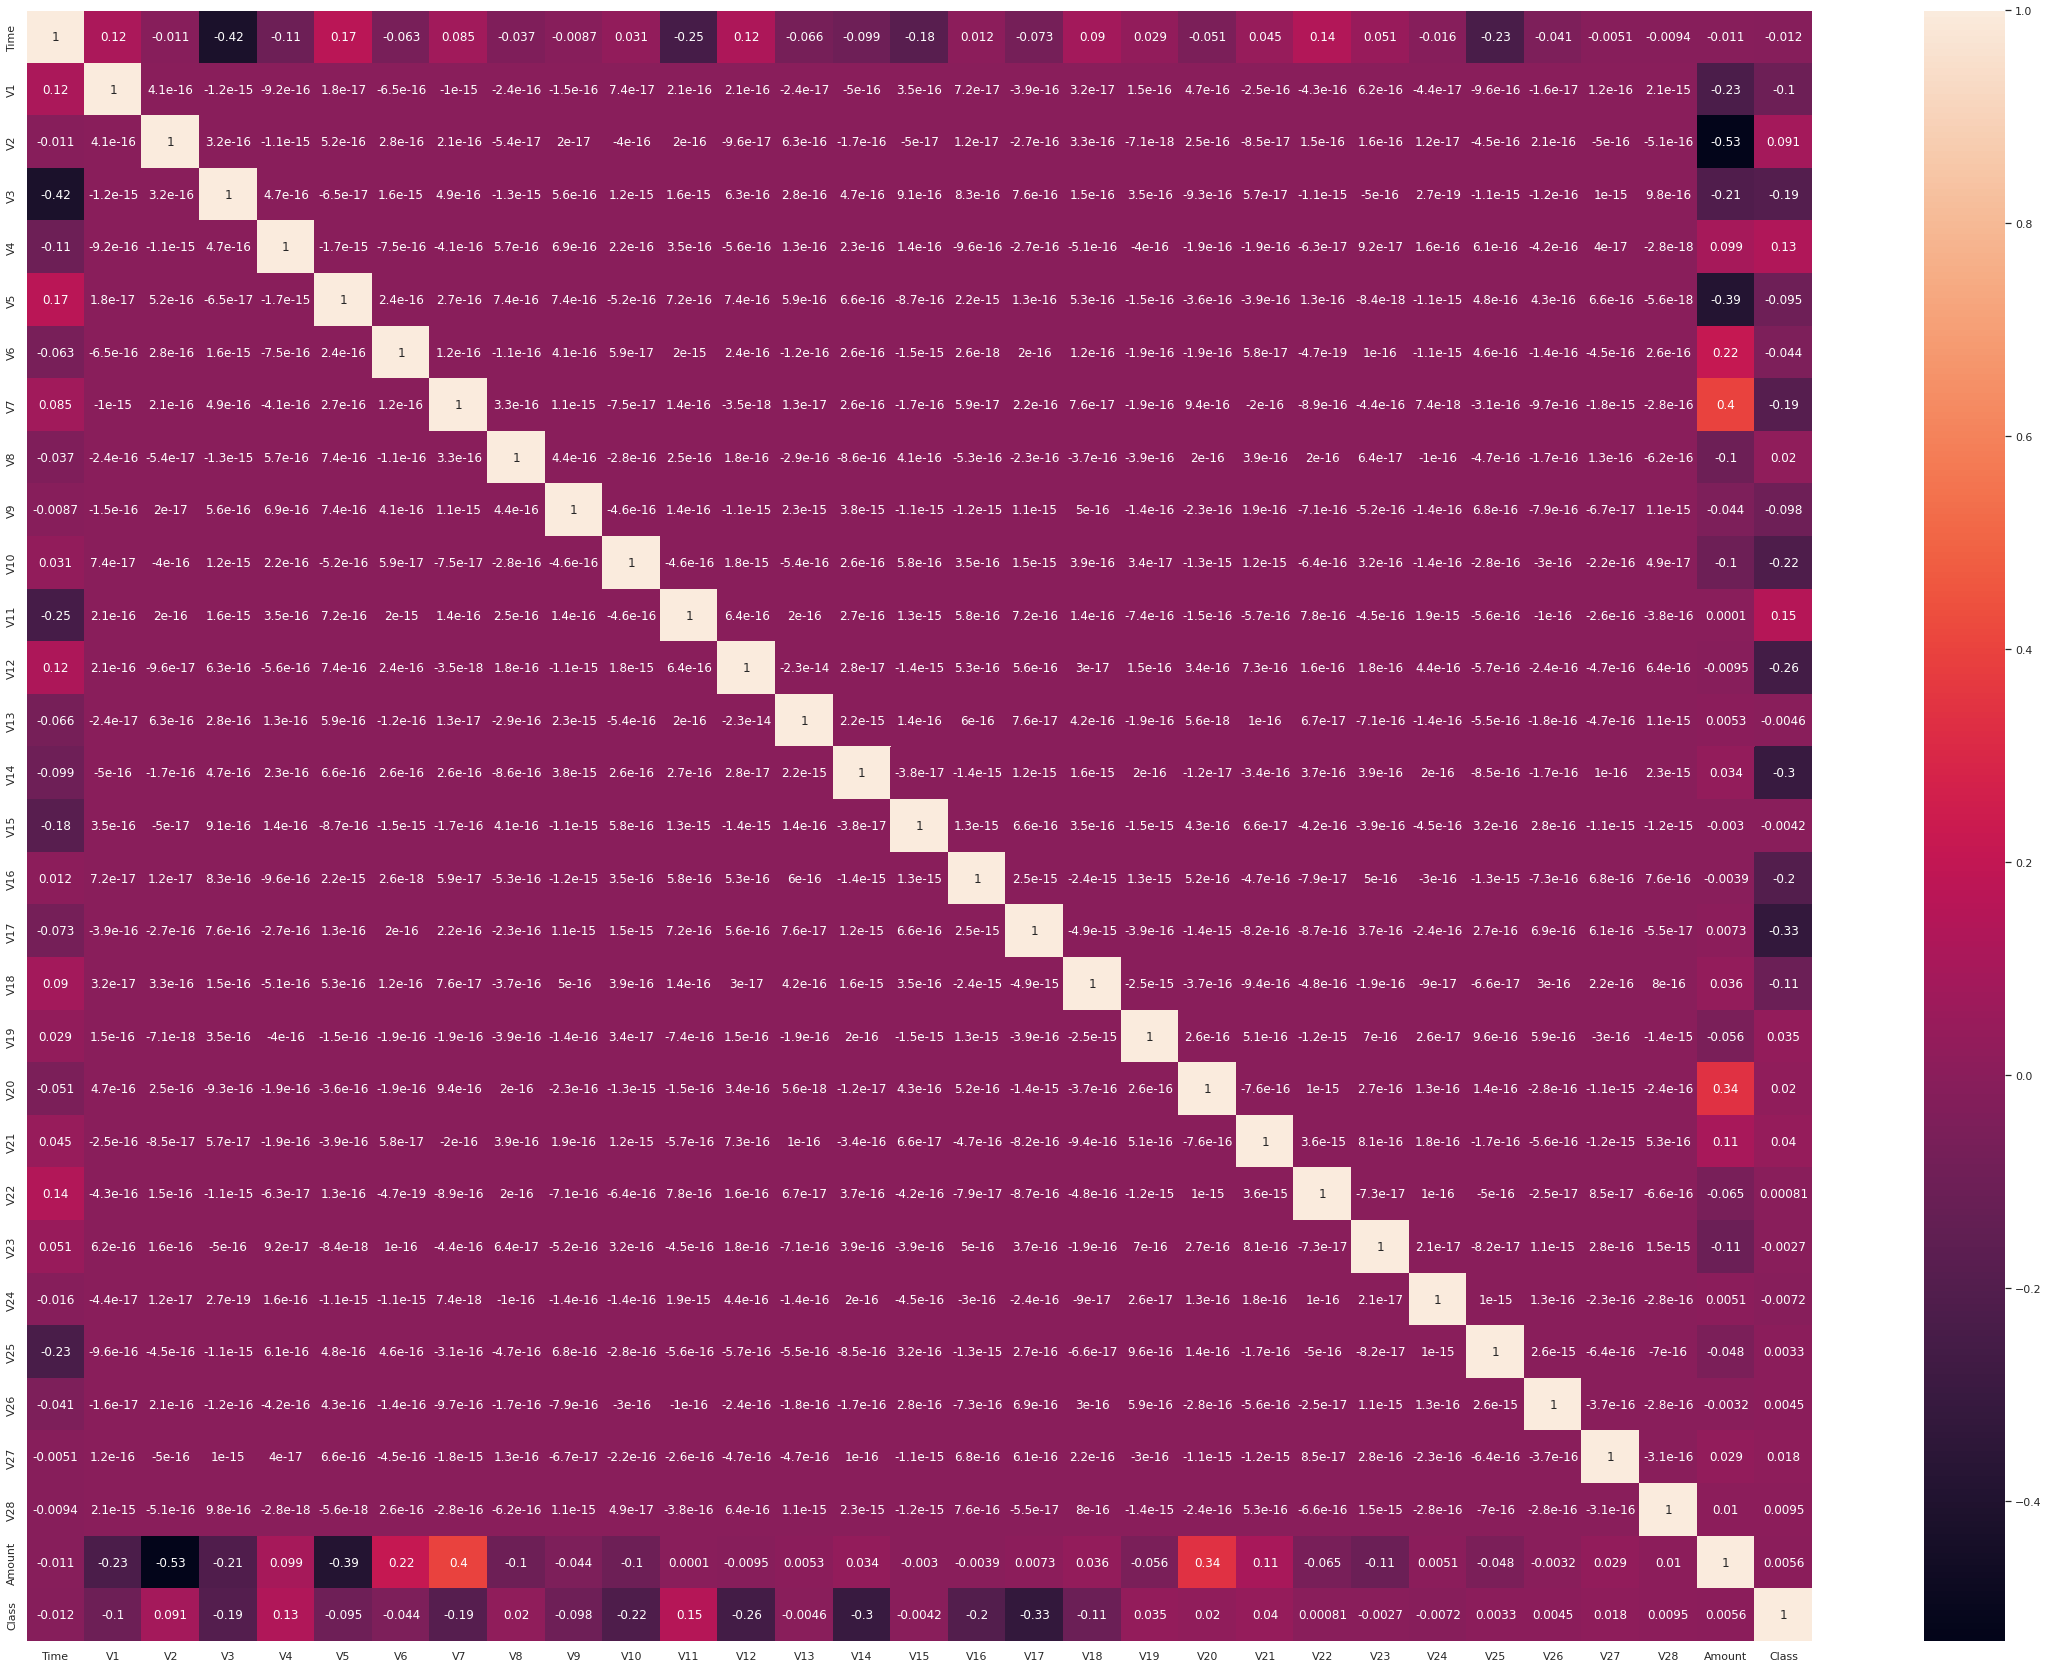

In [ ]:
#plt.figure(figsize=(40,50))
sns.set(rc={'figure.figsize':(40,30)})
sns.heatmap(data.corr(),annot=True)
plt.show()

improtant features according to heatmap:
v1,v3,v4,v7,v10,v11,v12,v14,v16,v17,v18.

In [ ]:
cor =data.corr()

#correlation with output variable
cor_target=abs(cor["Class"])

#Selecting highly correlated features
relevant_features =cor_target[cor_target>=0.1]
relevant_features   

V1       0.101347
V3       0.192961
V4       0.133447
V7       0.187257
V10      0.216883
V11      0.154876
V12      0.260593
V14      0.302544
V16      0.196539
V17      0.326481
V18      0.111485
Class    1.000000
Name: Class, dtype: float64

### see the corlation between the featrues and it self:


In [ ]:
features_name =relevant_features.keys()
for i in range(len(features_name)-2):
  j=i+1
  for j in range(len(features_name)-1):
    if abs(data[[features_name[i],features_name[i+1]]].corr().iat[0,1]) >=0.5:
      print(data[[features_name[i],features_name[i+1]]].corr())

   

there are no correlation between the features, so we can't rid of one them.


## check for the outliers to:


> 1. see what model to use
> 2. 
> which method used to normalize







In [ ]:
data.columns

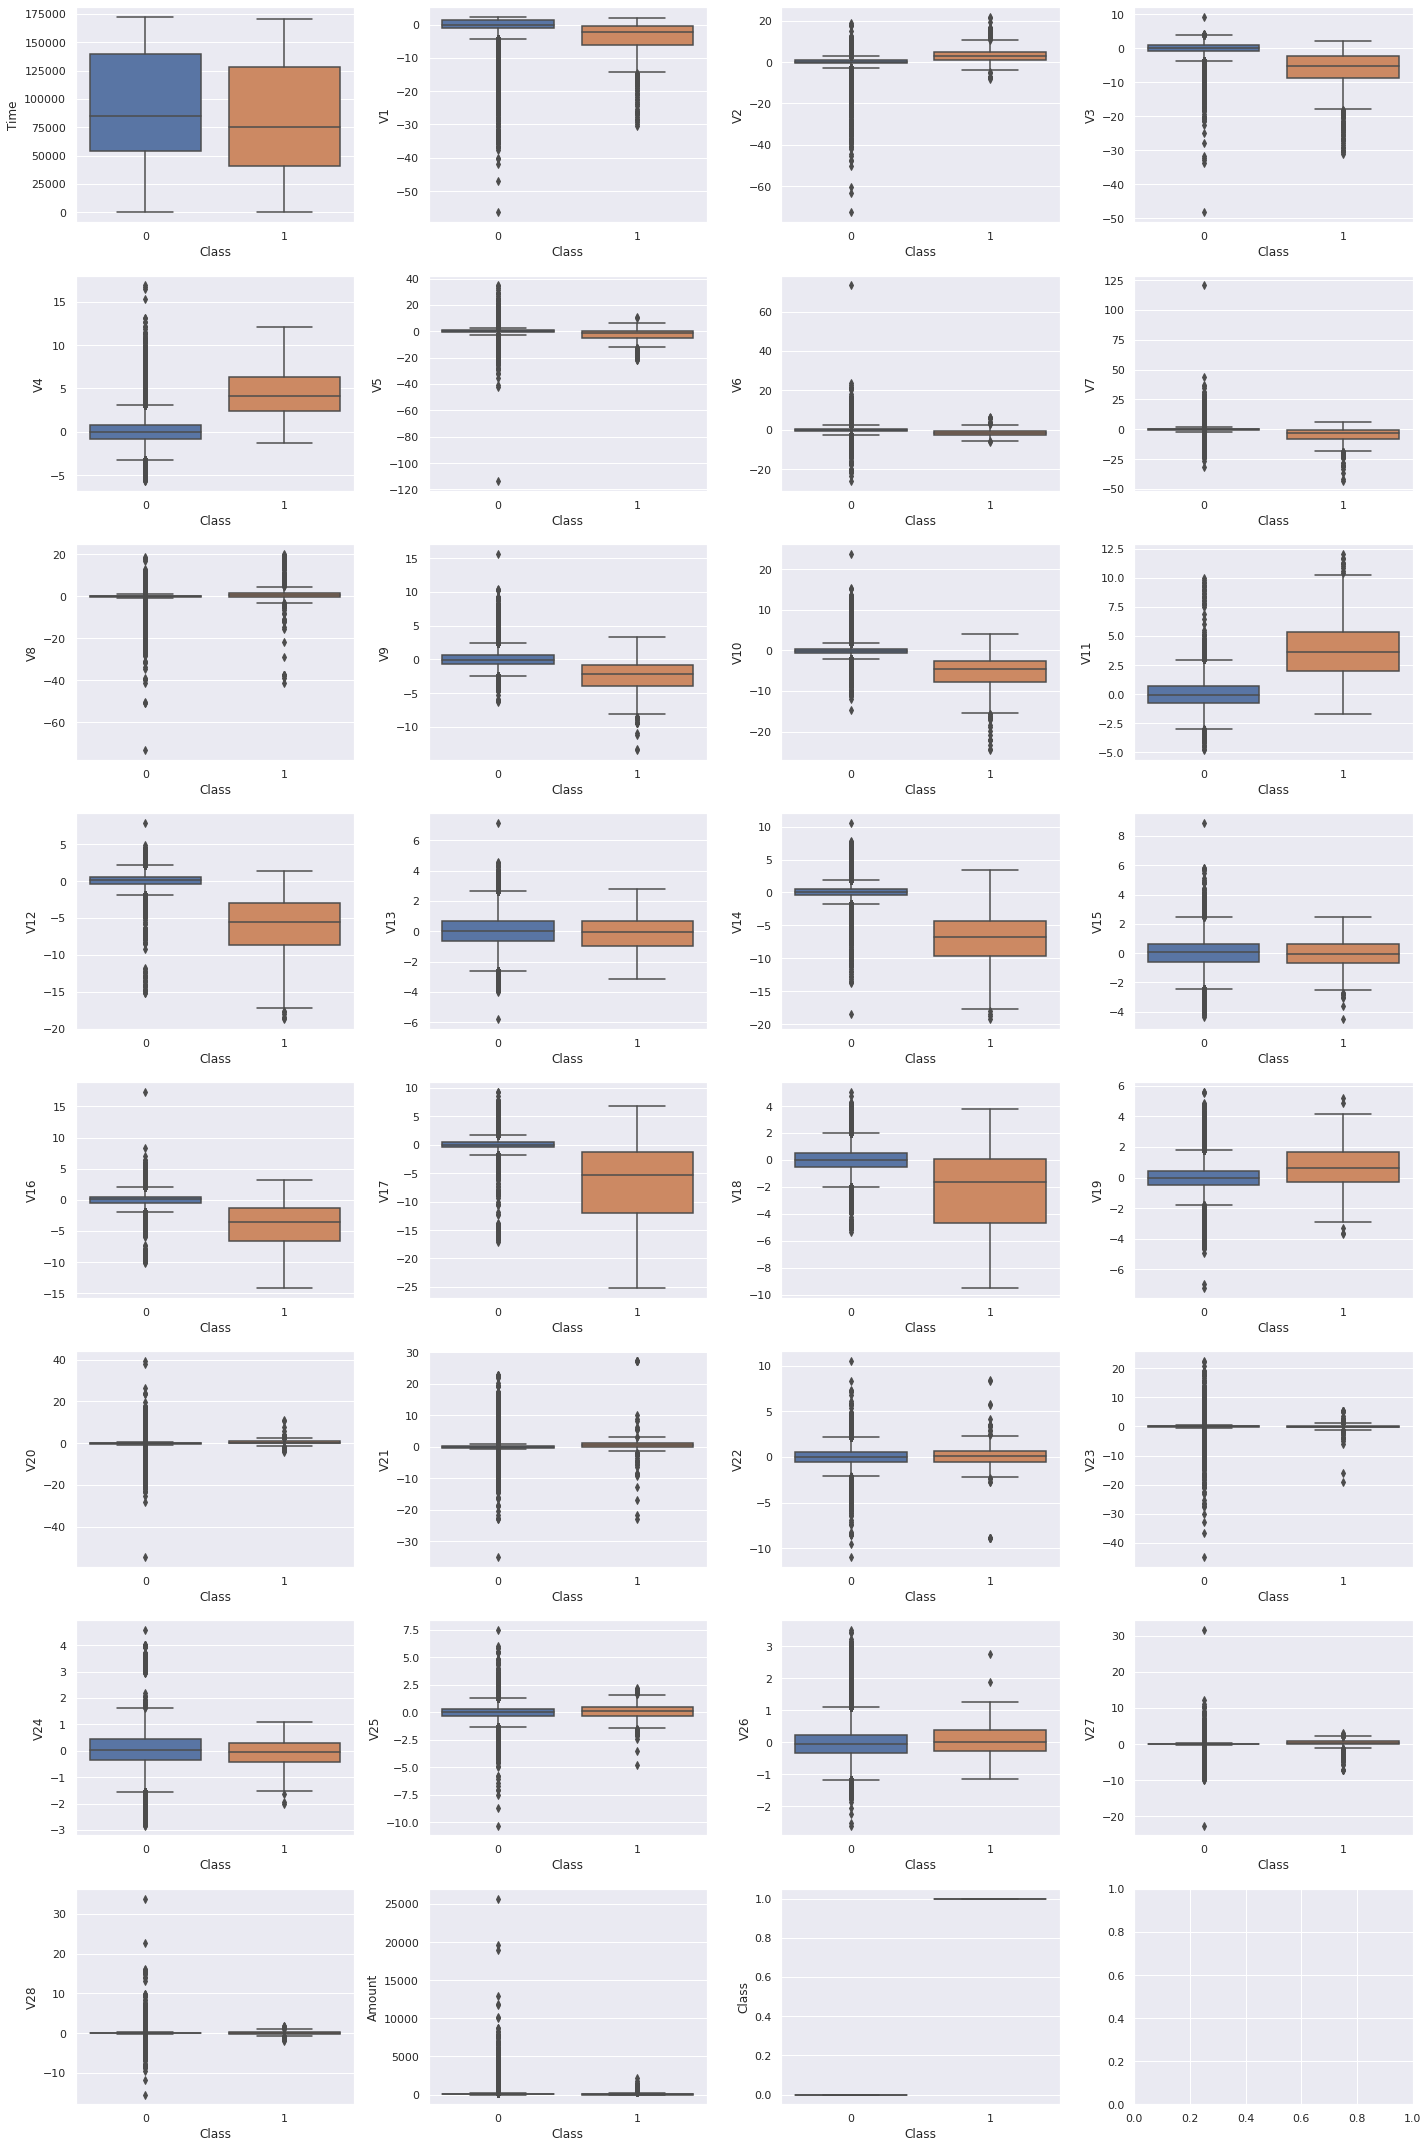

In [ ]:
import seaborn as sns

fig, ax=plt.subplots(ncols=4, nrows=8,figsize=(20,30))

ax=ax.flatten()

for i, col in enumerate(data):
  #sns.boxplot(data_fraud_parameter[col].loc[data['Class']==1],ax=ax[i],color='red')
  #sns.boxplot(data_fraud_parameter[col].loc[data['Class']==0],ax=ax[i],color='blue')
  # sns.boxplot(data[col],ax=ax[i],color='blue')
  sns.boxplot(data=data,y=col,x='Class',ax=ax[i])
  

plt.tight_layout()

many ouliers in the data:


> models to use:
> 1. random forest
> 2. logestic regression
> 3. SVM



> use standraziation to standraize the data





## features selection using anova:

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

In [ ]:
features_cols =data.drop(['Class'],axis=1)
target_cols =data['Class']

In [ ]:
fvalue_selector =SelectKBest(f_classif,k=20)

X_kbest =fvalue_selector.fit(features_cols,target_cols)

In [ ]:
features_score =pd.DataFrame(X_kbest.scores_)
features_pvalue =pd.DataFrame(np.round(X_kbest.pvalues_,4))
features_name =pd.DataFrame(features_cols.columns)
feature_score =pd.concat([features_name,features_score,features_pvalue],axis=1)

#assign the column names
feature_score.columns=['Input_Feature', 'F_Score','P_Value']
print(feature_score.nlargest(14,columns='F_Score'))
      

   Input_Feature       F_Score  P_Value
17           V17  33979.168593      0.0
14           V14  28695.547788      0.0
12           V12  20749.822361      0.0
10           V10  14057.979985      0.0
16           V16  11443.349428      0.0
3             V3  11014.508305      0.0
7             V7  10349.605408      0.0
11           V11   6999.355047      0.0
4             V4   5163.832114      0.0
18           V18   3584.380605      0.0
1             V1   2955.668946      0.0
9             V9   2746.600273      0.0
5             V5   2592.357929      0.0
2             V2   2393.401678      0.0


In [ ]:
selected_features =feature_score .nlargest(14,columns='F_Score')['Input_Feature']

In [ ]:
features_name=selected_features

## boxplot for selected features(anova):

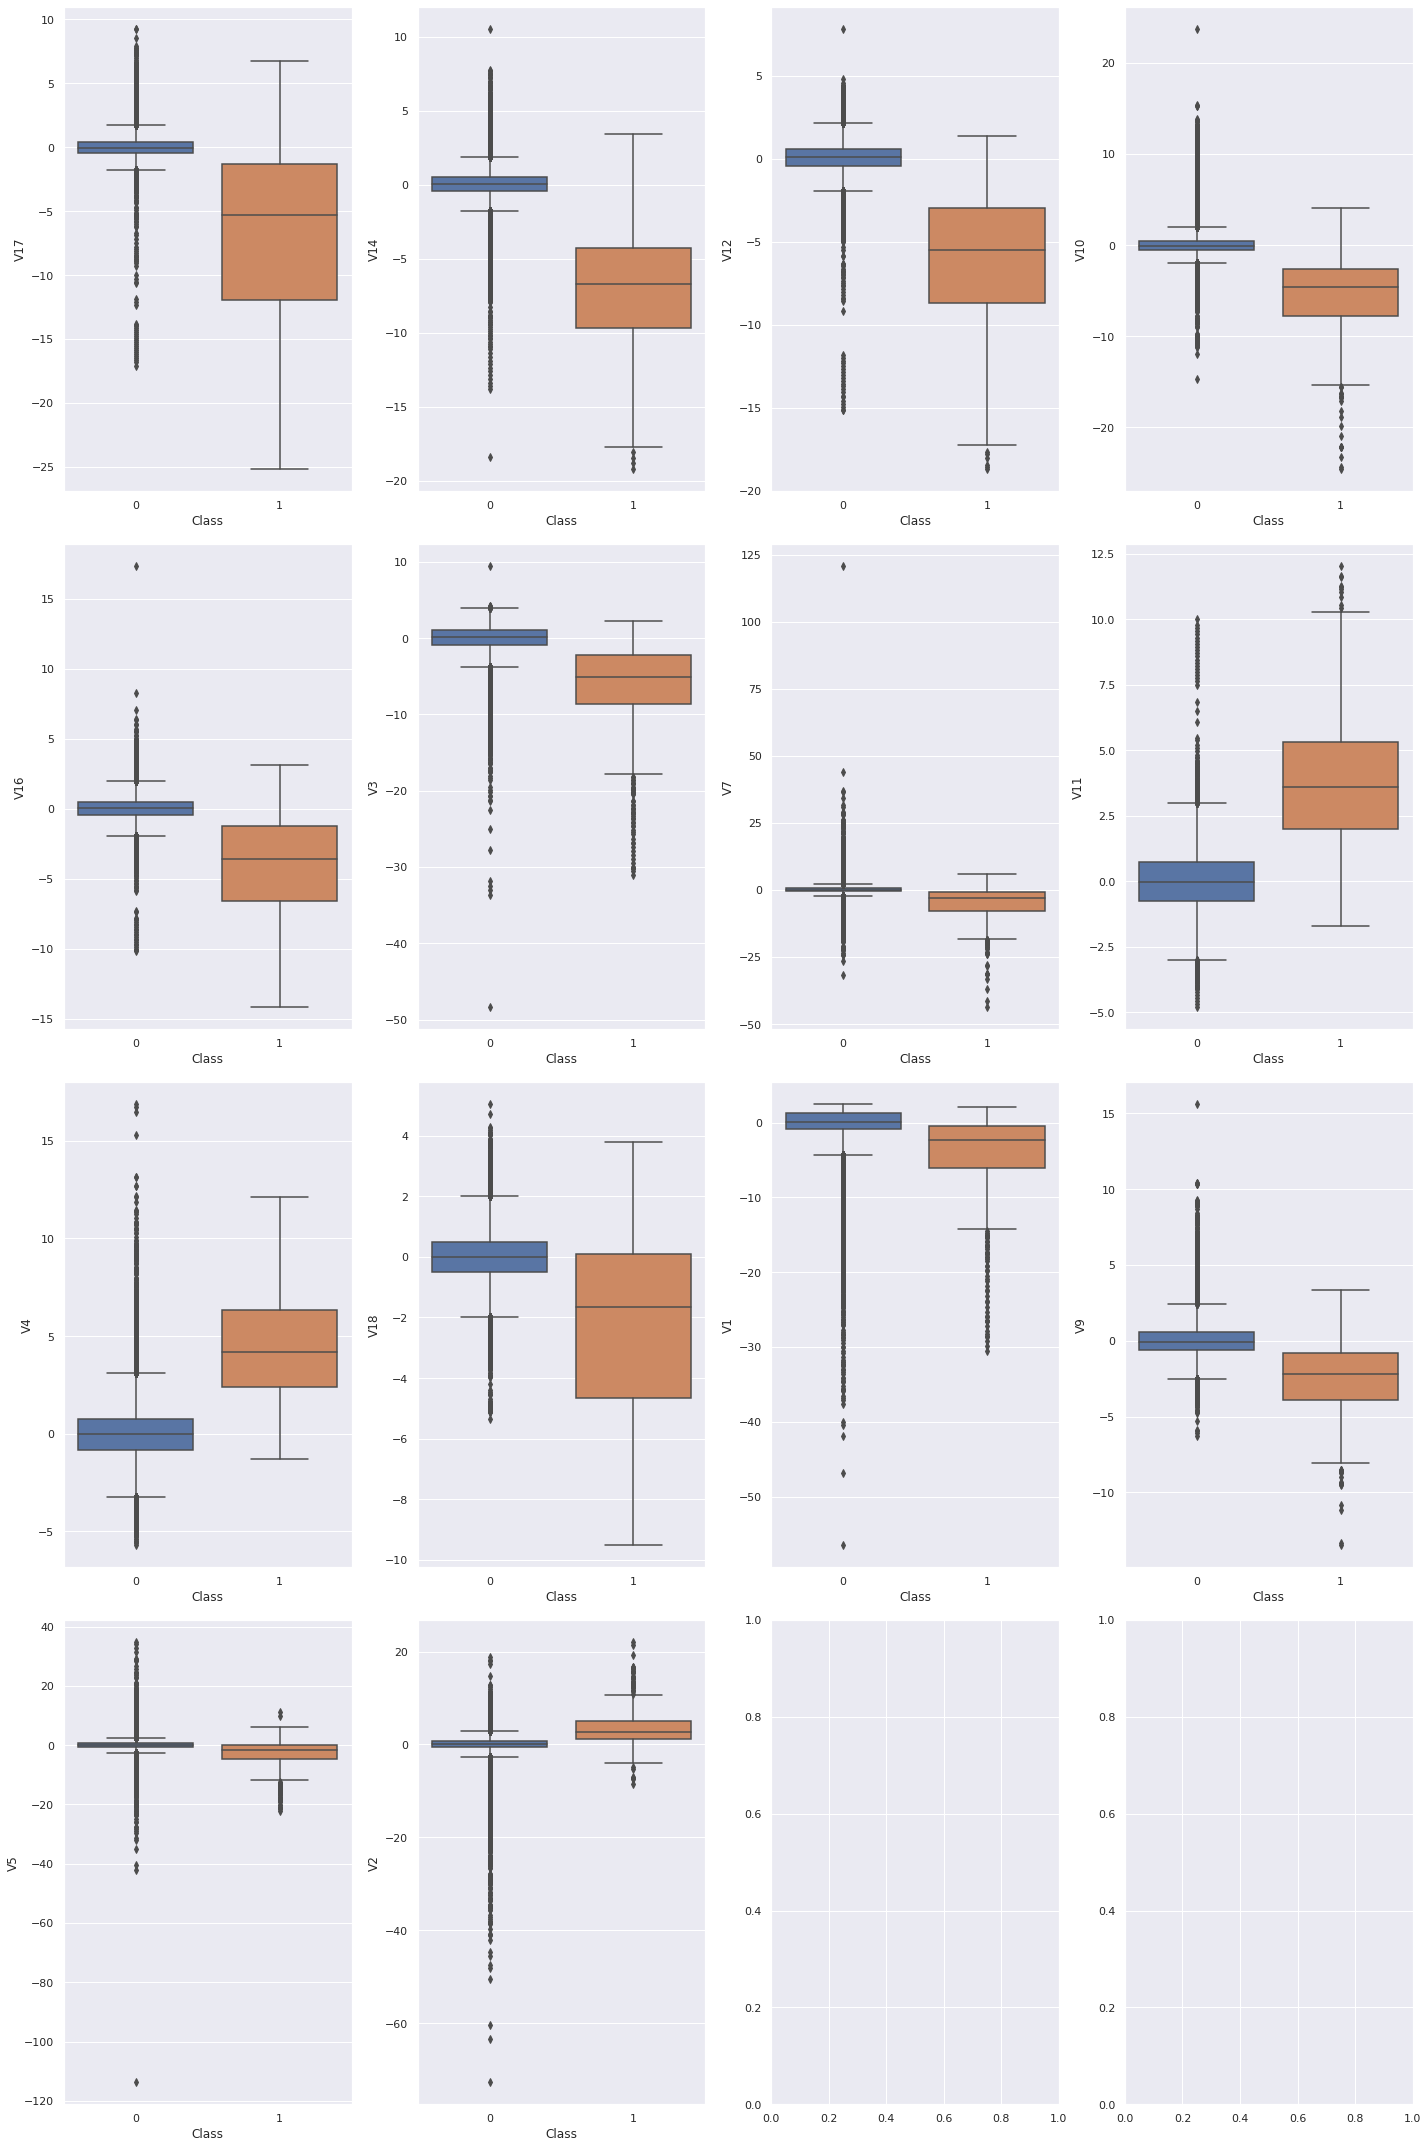

In [28]:
import seaborn as sns

fig, ax=plt.subplots(ncols=4, nrows=4,figsize=(20,30))

ax=ax.flatten()

for i, col in enumerate(features_name):
  #sns.boxplot(data_fraud_parameter[col].loc[data['Class']==1],ax=ax[i],color='red')
  #sns.boxplot(data_fraud_parameter[col].loc[data['Class']==0],ax=ax[i],color='blue')
  # sns.boxplot(data[col],ax=ax[i],color='blue')
  sns.boxplot(data=data,y=col,x='Class',ax=ax[i])
  

plt.tight_layout()

## Get rid of outliers of extracted features(anova):

In [ ]:
cols = ['FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY'] # one or more

Q1 = data[cols].quantile(0.25)
Q3 = data[cols].quantile(0.75)
IQR = Q3 - Q1

aa = data[~((data[cols] < (Q1 - 1.5 * IQR)) |(data[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Machine Learning

### split the original data to train, test datasets

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# split the data dataset

x_data =data.drop(['Class'],axis=1).values
y_data=data['Class'].values

x_train, x_test, y_train, y_test =train_test_split(x_data,y_data,test_size=0.3,random_state=1,stratify=y_data,shuffle=True)

In [ ]:
# take a copy from the original_train_dataset

x_train_without_standarization = x_train

In [ ]:
# data['Class'][data['Class']==1] 
y_train[y_train==1].shape
y_test[y_test==1].shape

(148,)

### split the extracted features to train, test datasets

In [ ]:
# split the data dataset

x_data_extract =data[features_name[:-1]].values

x_train_extract, x_test_exctract, y_train_extract, y_test_extract =train_test_split(x_data_extract,y_data,test_size=0.3,random_state=1,stratify=y_data,shuffle=True)

In [ ]:
x_train_RandomOverSample_extract_dataframe = pd.DataFrame(x_train_extract, columns=features_name[:-1])
x_train_RandomOverSample_extract_dataframe.head()

Input_Feature,V17,V14,V12,V10,V16,V3,V7,V11,V4,V18,V1,V9,V5
0,1.648897,-0.252977,0.752264,0.396879,-3.211514,0.703924,-0.897198,0.268544,0.069871,-1.297012,1.135011,-0.478801,-0.488154
1,-0.405073,-0.149358,0.375166,-1.275754,0.802805,1.347969,0.081125,-1.871478,-0.379954,0.153925,-1.786262,0.042585,-1.240680
2,-0.035668,-0.859411,-1.407557,2.035115,0.099132,2.615556,0.574245,-0.564418,2.362138,-0.053624,-0.683414,-0.811409,-0.012716
3,-0.207755,0.156943,1.138109,-0.939787,-0.419096,0.755202,-0.794616,1.101727,-0.963160,0.403235,1.183540,1.656943,-0.850295
4,-0.216624,0.250706,1.016011,0.015787,-0.130522,0.784402,-0.161727,1.084154,1.254973,-0.058071,1.137583,0.280587,-0.600870


### standraize the train datasets

In [ ]:
# before standraziation
pd.DataFrame(x_train)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,69627.0,1.135011,-0.663898,0.703924,0.069871,-0.488154,1.312078,-0.897198,0.463148,-0.478801,...,-0.677938,-0.331487,-0.069644,0.183987,-0.618678,0.089015,0.521419,0.086390,0.004782,1.00
1,83359.0,-1.786262,1.118886,1.347969,-0.379954,-1.240680,0.467667,0.081125,0.964933,0.042585,...,-0.099266,-0.047902,-0.182530,-0.162509,-0.405178,0.512595,0.299398,-0.042882,-0.059130,141.73
2,111723.0,-0.683414,0.679341,2.615556,2.362138,-0.012716,0.603826,0.574245,-0.679978,-0.811409,...,0.372610,-0.007167,0.463597,-0.243134,0.084557,-0.453177,2.687676,-1.084269,-0.511626,36.19
3,79444.0,1.183540,-0.493000,0.755202,-0.963160,-0.850295,0.145905,-0.794616,0.302199,1.656943,...,-0.168134,0.039588,0.339340,-0.053125,-0.298049,0.423994,-0.652284,0.102582,0.017292,1.00
4,62345.0,1.137583,0.105478,0.784402,1.254973,-0.600870,-0.360836,-0.161727,0.076092,0.280587,...,-0.178887,-0.195692,-0.443664,0.046270,0.516246,0.447943,-0.554949,0.031821,0.018177,7.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199359,50138.0,1.244059,0.190316,0.753666,0.925945,-0.328446,-0.051391,-0.331905,-0.020355,0.330893,...,-0.020050,-0.023295,0.013478,-0.092289,-0.448681,0.478955,-0.400379,0.061369,0.032971,8.60
199360,154502.0,-0.312808,1.571520,0.625071,2.851596,1.440896,0.370273,1.559423,-0.122626,-2.127059,...,-0.013666,-0.072840,-0.276301,-0.144144,-0.813403,-0.094574,-0.086966,0.101273,0.154888,49.66
199361,127940.0,2.313488,-1.066660,-2.698797,-1.810692,0.181929,-0.825158,0.014053,-0.497443,-2.466535,...,-0.303714,0.175502,0.943729,-0.209989,0.371705,0.688140,0.270351,-0.078804,-0.087019,54.00
199362,143903.0,1.980328,0.104427,-0.923277,1.353652,0.047918,-0.223057,-0.382536,0.034461,0.965143,...,-0.217607,-0.283405,-0.677841,0.263567,-0.961968,-0.298113,-0.888231,0.073120,-0.005631,7.90


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# standarize original dataset
x_train_standar =StandardScaler().fit_transform(x_train)

# standarize extracted features dataset

x_train_extract_standar =StandardScaler().fit_transform(x_train_extract)

In [ ]:
# After standraziation
pd.DataFrame(x_train, columns=data.columns[:-1])

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,69627.0,1.135011,-0.663898,0.703924,0.069871,-0.488154,1.312078,-0.897198,0.463148,-0.478801,...,-0.677938,-0.331487,-0.069644,0.183987,-0.618678,0.089015,0.521419,0.086390,0.004782,1.00
1,83359.0,-1.786262,1.118886,1.347969,-0.379954,-1.240680,0.467667,0.081125,0.964933,0.042585,...,-0.099266,-0.047902,-0.182530,-0.162509,-0.405178,0.512595,0.299398,-0.042882,-0.059130,141.73
2,111723.0,-0.683414,0.679341,2.615556,2.362138,-0.012716,0.603826,0.574245,-0.679978,-0.811409,...,0.372610,-0.007167,0.463597,-0.243134,0.084557,-0.453177,2.687676,-1.084269,-0.511626,36.19
3,79444.0,1.183540,-0.493000,0.755202,-0.963160,-0.850295,0.145905,-0.794616,0.302199,1.656943,...,-0.168134,0.039588,0.339340,-0.053125,-0.298049,0.423994,-0.652284,0.102582,0.017292,1.00
4,62345.0,1.137583,0.105478,0.784402,1.254973,-0.600870,-0.360836,-0.161727,0.076092,0.280587,...,-0.178887,-0.195692,-0.443664,0.046270,0.516246,0.447943,-0.554949,0.031821,0.018177,7.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199359,50138.0,1.244059,0.190316,0.753666,0.925945,-0.328446,-0.051391,-0.331905,-0.020355,0.330893,...,-0.020050,-0.023295,0.013478,-0.092289,-0.448681,0.478955,-0.400379,0.061369,0.032971,8.60
199360,154502.0,-0.312808,1.571520,0.625071,2.851596,1.440896,0.370273,1.559423,-0.122626,-2.127059,...,-0.013666,-0.072840,-0.276301,-0.144144,-0.813403,-0.094574,-0.086966,0.101273,0.154888,49.66
199361,127940.0,2.313488,-1.066660,-2.698797,-1.810692,0.181929,-0.825158,0.014053,-0.497443,-2.466535,...,-0.303714,0.175502,0.943729,-0.209989,0.371705,0.688140,0.270351,-0.078804,-0.087019,54.00
199362,143903.0,1.980328,0.104427,-0.923277,1.353652,0.047918,-0.223057,-0.382536,0.034461,0.965143,...,-0.217607,-0.283405,-0.677841,0.263567,-0.961968,-0.298113,-0.888231,0.073120,-0.005631,7.90


In [ ]:
pd.DataFrame(x_train_extract_standar, columns=features_name[:-1])

Input_Feature,V17,V14,V12,V10,V16,V3,V7,V11,V4,V18,V1,V9,V5
0,1.948276,-0.268277,0.753066,0.368616,-3.660543,0.464574,-0.723594,0.261428,0.046589,-1.548892,0.581908,-0.437559,-0.351486
1,-0.480518,-0.159778,0.375593,-1.179582,0.917384,0.891215,0.065528,-1.835650,-0.271287,0.182003,-0.920022,0.038255,-0.896566
2,-0.043701,-0.903271,-1.408900,1.884975,0.114916,1.730917,0.463283,-0.554819,1.666458,-0.065592,-0.353009,-0.741095,-0.007110
3,-0.247192,0.160949,1.139294,-0.868609,-0.476070,0.498542,-0.640850,1.077891,-0.683419,0.479418,0.606858,1.511510,-0.613797
4,-0.257680,0.259127,1.017075,0.015876,-0.146981,0.517886,-0.130358,1.060670,0.884061,-0.070897,0.583230,0.255455,-0.433130
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199359,-1.204239,-0.232400,0.521268,-0.071822,0.859618,0.497525,-0.267624,-0.954981,0.651548,0.386574,0.637973,0.301364,-0.235804
199360,-0.950379,0.198969,-0.602228,0.669387,0.598349,0.412338,1.257935,-1.868374,2.012341,-0.536780,-0.162467,-1.941750,1.045790
199361,0.487662,0.332592,-0.056041,1.727799,-1.366015,-1.789529,0.011428,0.550572,-1.282342,0.078152,1.187805,-2.251554,0.133878
199362,0.100160,-1.306289,-0.197670,-0.315147,1.075374,-0.613352,-0.308464,-1.207286,0.953794,0.706117,1.016516,0.880177,0.036809


### overSample the train datasets using random and SMOTE

#### OverSampling using random

##### OverSampling:RandomSampling => for original data

###### wihtout standarization:

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros =RandomOverSampler()

x_train_RandomOverSample, y_train_RandomOverSample =ros.fit_resample(x_train,y_train)


In [ ]:
from collections import Counter

print('Original dataset shape: {}'.format(Counter(y_train)))
print('RandomOverSampel dataset shape: {}'.format(Counter(y_train_RandomOverSample)))

Original dataset shape: Counter({0: 199020, 1: 344})
RandomOverSampel dataset shape: Counter({0: 199020, 1: 199020})


###### with standarization:

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros =RandomOverSampler()

x_train_standar_RandomOverSample, y_train_standar_RandomOverSample =ros.fit_resample(x_train_standar,y_train)


In [ ]:
from collections import Counter

print('Original dataset shape: {}'.format(Counter(y_train)))
print('RandomOverSampel dataset shape: {}'.format(Counter(y_train_standar_RandomOverSample)))

Original dataset shape: Counter({0: 199020, 1: 344})
RandomOverSampel dataset shape: Counter({0: 199020, 1: 199020})


##### OverSampling:RandomSampling => for extracted data

###### without standarization:

In [ ]:
ros =RandomOverSampler()

x_train_extract_RandomOverSample, y_train_extract_RandomOverSample =ros.fit_resample(x_train_extract,y_train_extract)


In [ ]:
from collections import Counter

print('Original dataset shape: {}'.format(Counter(y_train)))
print('RandomOverSampel dataset shape: {}'.format(Counter(y_train_extract_RandomOverSample)))

Original dataset shape: Counter({0: 199020, 1: 344})
RandomOverSampel dataset shape: Counter({0: 199020, 1: 199020})


###### with standarization: 

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros =RandomOverSampler()

x_train_extract_standar_RandomOverSample, y_train_extract_standar_RandomOverSample =ros.fit_resample(x_train_extract_standar,y_train)


In [ ]:
from collections import Counter

print('Original dataset shape: {}'.format(Counter(y_train)))
print('RandomOverSampel dataset shape: {}'.format(Counter(y_train_extract_standar_RandomOverSample)))

Original dataset shape: Counter({0: 199020, 1: 344})
RandomOverSampel dataset shape: Counter({0: 199020, 1: 199020})


#### OverSampling: SMOTE

##### OverSampling:SMOTE => for original data

###### wihtout standarization:

In [ ]:
from imblearn.combine import SMOTETomek

smote =SMOTETomek()

x_train_SMOTE, y_train_SMOTE =smote.fit_resample(x_train,y_train)

In [ ]:
from collections import Counter

print('Original dataset shape: {}'.format(Counter(y_train)))
print('Original SMOTE dataset shape: {}'.format(Counter(y_train_SMOTE)))

Original dataset shape: Counter({0: 199020, 1: 344})
Original SMOTE dataset shape: Counter({0: 198405, 1: 198405})


###### with standarization:

In [ ]:
x_train_standar_SMOTE, y_train_standar_SMOTE =smote.fit_resample(x_train_standar,y_train)

In [ ]:
from collections import Counter

print('Original dataset shape: {}'.format(Counter(y_train)))
print('RandomOverSampel dataset shape: {}'.format(Counter(y_train_standar_SMOTE)))

Original dataset shape: Counter({0: 199020, 1: 344})
RandomOverSampel dataset shape: Counter({0: 199020, 1: 199020})


##### OverSampling:SMOTE => for extracted data

###### without standarization:

In [ ]:
x_train_extract_SMOTE, y_train_extract_SMOTE =smote.fit_resample(x_train_extract,y_train)

In [ ]:
from collections import Counter

print('Original dataset shape: {}'.format(Counter(y_train)))
print('extracted SMOTE dataset shape: {}'.format(Counter(y_train_extract_SMOTE)))

Original dataset shape: Counter({0: 199020, 1: 344})
extracted SMOTE dataset shape: Counter({0: 199020, 1: 199020})


###### with standarization: 

In [ ]:
x_train_extract_standar_SMOTE, y_train_extract_standar_SMOTE =smote.fit_resample(x_train_extract_standar,y_train)

In [ ]:
from collections import Counter

print('Original dataset shape: {}'.format(Counter(y_train)))
print('extracted standar SMOTE dataset shape: {}'.format(Counter(y_train_extract_standar_SMOTE)))

Original dataset shape: Counter({0: 199020, 1: 344})
extracted standar SMOTE dataset shape: Counter({0: 199020, 1: 199020})


## variables Reminder:


>  
1. original data: x_train, y_train
2. original standard data: 
x_train_standar,y_train
2. original randomOverSample data: 
x_train_RandomOverSample, y_train_RandomOverSample
3. standar randomOverSample data:
x_train_standar_RandomOverSample, y_train_standar_RandomOverSample
4. extracted features of RandomOverSample:
x_train_extract_RandomOverSample,y_train_RandomOverSample
5. standard extracted features of RandomOverSample:
x_train_extract_standar_RandomOverSample,y_train_standar_RandomOverSample
2. original SMOTE data: 
x_train_SMOTE, y_train_SMOTE
3. standar SMOTE data:
x_train_standar_SMOTE, y_train_standar_SMOTE
4. extracted features of SMOTE:
x_train_extract_SMOTE,y_train_SMOTE
5. standard extracted features of SMOTE:
x_train_extract_standar_SMOTE,y_train_standar_SMOTE


## Applying machine learning models:

In [ ]:
import matplotlib.pyplot as plt

### RandomForest:


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model =RandomForestClassifier()

#### Original dataset using RandomForest:

##### evaluation using original dataset:

In [ ]:
rf_model.fit(x_train, y_train)
y_pred =rf_model.predict(x_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.94      0.84      0.89       148

    accuracy                           1.00     85443
   macro avg       0.97      0.92      0.94     85443
weighted avg       1.00      1.00      1.00     85443

f1_score = 0.8857142857142858
recall = 0.8378378378378378
precision 0.9393939393939394


<function matplotlib.pyplot.show(*args, **kw)>

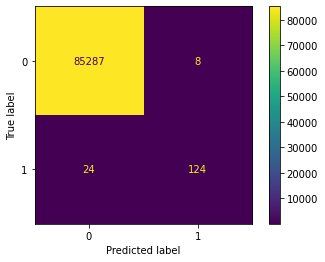

<Figure size 720x360 with 0 Axes>

In [ ]:
from sklearn.metrics import classification_report, accuracy_score ,f1_score, recall_score , precision_score, confusion_matrix, ConfusionMatrixDisplay

print(classification_report(y_test,y_pred))

f1_score =f1_score(y_test, y_pred)
recall =recall_score(y_test, y_pred)
precision =precision_score(y_test,y_pred)

print('f1_score =', f1_score)
print('recall =', recall)
print('precision', precision)

conf_mat =confusion_matrix(y_test,y_pred)
                           
cm_display =ConfusionMatrixDisplay(confusion_matrix=conf_mat)

cm_display.plot()

plt.figure(figsize=(10,5))
plt.show

##### evaluation using standaraized original dataset:

In [ ]:
rf_model.fit(x_train_standar,y_train)
y_pred_standar =rf_model.predict(x_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.90      0.83      0.87       148

    accuracy                           1.00     85443
   macro avg       0.95      0.92      0.93     85443
weighted avg       1.00      1.00      1.00     85443

f1_score = 0.8857142857142858
recall = 0.831081081081081
precision 0.9044117647058824


<function matplotlib.pyplot.show(*args, **kw)>

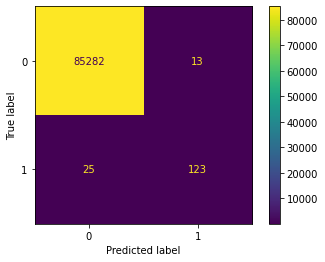

<Figure size 720x360 with 0 Axes>

In [ ]:
from sklearn.metrics import classification_report, f1_score , recall_score, precision_score, confusion_matrix, ConfusionMatrixDisplay

print(classification_report(y_test,y_pred_standar))

f1_score =f1_score(y_test, y_pred)
recall =recall_score(y_test, y_pred_standar)
precision =precision_score(y_test,y_pred_standar)

print('f1_score =', f1_score)
print('recall =', recall)
print('precision', precision)

conf_mat =confusion_matrix(y_test,y_pred_standar)
                           
cm_display =ConfusionMatrixDisplay(confusion_matrix=conf_mat)

cm_display.plot()

plt.figure(figsize=(10,5))
plt.show

#### randomOverSample dataset using RandomForest:

##### evaluating using original randomOverSample dataset:

In [ ]:
rf_model.fit(x_train_RandomOverSample, y_train_RandomOverSample)
y_pred_RandomOverSample =rf_model.predict(x_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.93      0.84      0.88       148

    accuracy                           1.00     85443
   macro avg       0.97      0.92      0.94     85443
weighted avg       1.00      1.00      1.00     85443

recall = 0.8378378378378378
precision 0.9323308270676691


<function matplotlib.pyplot.show(*args, **kw)>

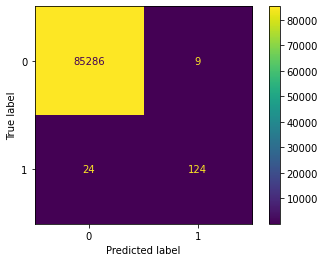

<Figure size 720x360 with 0 Axes>

In [ ]:
print(classification_report(y_test,y_pred_RandomOverSample))

#f1_score =f1_score(y_test, y_pred_RandomOverSample)
recall =recall_score(y_test, y_pred_RandomOverSample)
precision =precision_score(y_test,y_pred_RandomOverSample)

#print('f1_score =', f1_score)
print('recall =', recall)
print('precision', precision)

conf_mat =confusion_matrix(y_test,y_pred_RandomOverSample)
                           
cm_display =ConfusionMatrixDisplay(confusion_matrix=conf_mat)

cm_display.plot()

plt.figure(figsize=(10,5))
plt.show

##### evaluating using original standard randomOverSample dataset:

In [ ]:
rf_model.fit(x_train_standar_RandomOverSample, y_train_standar_RandomOverSample)
y_pred_standar_RandomOverSample=rf_model.predict(x_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.90      0.77      0.83       148

    accuracy                           1.00     85443
   macro avg       0.95      0.89      0.91     85443
weighted avg       1.00      1.00      1.00     85443

recall = 0.7702702702702703
precision 0.8976377952755905


<function matplotlib.pyplot.show(*args, **kw)>

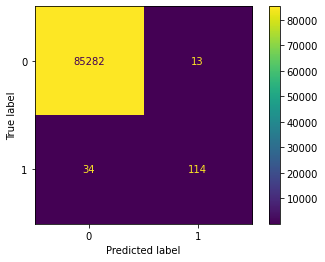

<Figure size 720x360 with 0 Axes>

In [ ]:
print(classification_report(y_test,y_pred_standar_RandomOverSample))

#f1_score =f1_score(y_test, y_pred_RandomOverSample_extract)
recall =recall_score(y_test, y_pred_standar_RandomOverSample)
precision =precision_score(y_test,y_pred_standar_RandomOverSample)

#print('f1_score =', f1_score)
print('recall =', recall)
print('precision', precision)

conf_mat =confusion_matrix(y_test,y_pred_standar_RandomOverSample)
                           
cm_display =ConfusionMatrixDisplay(confusion_matrix=conf_mat)

cm_display.plot()

plt.figure(figsize=(10,5))
plt.show

##### evaluating using extracted features randomOverSample dataset:

In [ ]:
rf_model.fit(x_train_extract_RandomOverSample,y_train_RandomOverSample)
y_pred_RandomOverSample_extract=rf_model.predict(x_test_exctract)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.93      0.84      0.89       148

    accuracy                           1.00     85443
   macro avg       0.97      0.92      0.94     85443
weighted avg       1.00      1.00      1.00     85443

recall = 0.8445945945945946
precision 0.9328358208955224


<function matplotlib.pyplot.show(*args, **kw)>

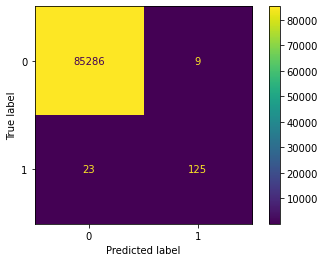

<Figure size 720x360 with 0 Axes>

In [ ]:
print(classification_report(y_test_extract,y_pred_RandomOverSample_extract))

#f1_score =f1_score(y_test, y_pred_RandomOverSample_extract)
recall =recall_score(y_test_extract, y_pred_RandomOverSample_extract)
precision =precision_score(y_test_extract,y_pred_RandomOverSample_extract)

#print('f1_score =', f1_score)
print('recall =', recall)
print('precision', precision)

conf_mat =confusion_matrix(y_test_extract,y_pred_RandomOverSample_extract)
                           
cm_display =ConfusionMatrixDisplay(confusion_matrix=conf_mat)

cm_display.plot()

plt.figure(figsize=(10,5))
plt.show

##### evaluating using standard extracted randomOverSample dataset:

In [ ]:
rf_model.fit(x_train_extract_standar_RandomOverSample,y_train_standar_RandomOverSample)
y_pred_extract_standar_RandomOverSample =rf_model.predict(x_test_exctract)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.90      0.76      0.82       148

    accuracy                           1.00     85443
   macro avg       0.95      0.88      0.91     85443
weighted avg       1.00      1.00      1.00     85443

recall = 0.7567567567567568
precision 0.896


<function matplotlib.pyplot.show(*args, **kw)>

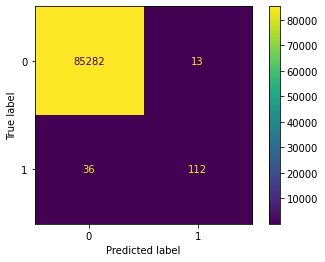

<Figure size 720x360 with 0 Axes>

In [ ]:
print(classification_report(y_test_extract,y_pred_extract_standar_RandomOverSample))

#f1_score =f1_score(y_test, y_pred_RandomOverSample_extract)
recall =recall_score(y_test_extract, y_pred_extract_standar_RandomOverSample)
precision =precision_score(y_test_extract,y_pred_extract_standar_RandomOverSample)

#print('f1_score =', f1_score)
print('recall =', recall)
print('precision', precision)

conf_mat =confusion_matrix(y_test_extract,y_pred_extract_standar_RandomOverSample)
                           
cm_display =ConfusionMatrixDisplay(confusion_matrix=conf_mat)

cm_display.plot()

plt.figure(figsize=(10,5))
plt.show

#### SMOTE dataset using RandomForest:

##### evaluating using original SMOTE dataset:

In [ ]:
rf_model.fit(x_train_SMOTE, y_train_SMOTE)
y_pred_SMOTE =rf_model.predict(x_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.89      0.86      0.88       148

    accuracy                           1.00     85443
   macro avg       0.94      0.93      0.94     85443
weighted avg       1.00      1.00      1.00     85443

recall = 0.8648648648648649
precision 0.8888888888888888


<function matplotlib.pyplot.show(*args, **kw)>

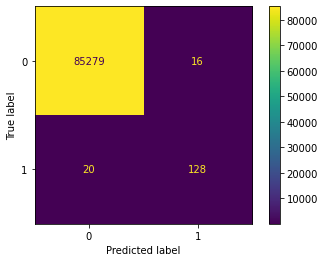

<Figure size 720x360 with 0 Axes>

In [ ]:
print(classification_report(y_test,y_pred_SMOTE))

#f1_score =f1_score(y_test, y_pred_RandomOverSample)
recall =recall_score(y_test, y_pred_SMOTE)
precision =precision_score(y_test,y_pred_SMOTE)

#print('f1_score =', f1_score)
print('recall =', recall)
print('precision', precision)

conf_mat =confusion_matrix(y_test,y_pred_SMOTE)
                           
cm_display =ConfusionMatrixDisplay(confusion_matrix=conf_mat)

cm_display.plot()

plt.figure(figsize=(10,5))
plt.show

##### evaluating using original standard SMOTE dataset:

In [ ]:
rf_model.fit(x_train_standar_SMOTE, y_train_standar_SMOTE)
y_pred_standar_SMOTE=rf_model.predict(x_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.88      0.77      0.82       148

    accuracy                           1.00     85443
   macro avg       0.94      0.89      0.91     85443
weighted avg       1.00      1.00      1.00     85443

recall = 0.7702702702702703
precision 0.8837209302325582


<function matplotlib.pyplot.show(*args, **kw)>

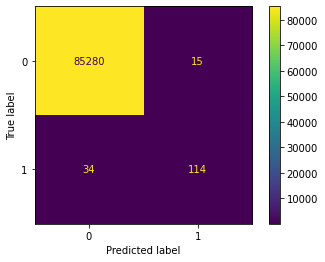

<Figure size 720x360 with 0 Axes>

In [ ]:
print(classification_report(y_test,y_pred_standar_SMOTE))

#f1_score =f1_score(y_test, y_pred_RandomOverSample_extract)
recall =recall_score(y_test, y_pred_standar_SMOTE)
precision =precision_score(y_test,y_pred_standar_SMOTE)

#print('f1_score =', f1_score)
print('recall =', recall)
print('precision', precision)

conf_mat =confusion_matrix(y_test,y_pred_standar_SMOTE)
                           
cm_display =ConfusionMatrixDisplay(confusion_matrix=conf_mat)

cm_display.plot()

plt.figure(figsize=(10,5))
plt.show

##### evaluating using extracted features randomOverSample dataset:

In [ ]:
rf_model.fit(x_train_extract_SMOTE,y_train_extract_SMOTE)
y_pred_SMOTE_extract=rf_model.predict(x_test_exctract)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.83      0.87      0.85       148

    accuracy                           1.00     85443
   macro avg       0.92      0.94      0.93     85443
weighted avg       1.00      1.00      1.00     85443

recall = 0.8716216216216216
precision 0.832258064516129


<function matplotlib.pyplot.show(*args, **kw)>

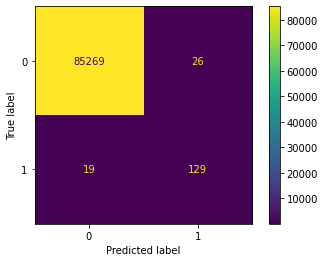

<Figure size 720x360 with 0 Axes>

In [ ]:
print(classification_report(y_test_extract,y_pred_SMOTE_extract))

#f1_score =f1_score(y_test, y_pred_RandomOverSample_extract)
recall =recall_score(y_test_extract, y_pred_SMOTE_extract)
precision =precision_score(y_test_extract,y_pred_SMOTE_extract)

#print('f1_score =', f1_score)
print('recall =', recall)
print('precision', precision)

conf_mat =confusion_matrix(y_test_extract,y_pred_SMOTE_extract)
                           
cm_display =ConfusionMatrixDisplay(confusion_matrix=conf_mat)

cm_display.plot()

plt.figure(figsize=(10,5))
plt.show

##### evaluating using standard extracted randomOverSample dataset:

In [ ]:
rf_model.fit(x_train_extract_standar_SMOTE,y_train_standar_SMOTE)
y_pred_extract_standar_SMOTE =rf_model.predict(x_test_exctract)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.88      0.78      0.82       148

    accuracy                           1.00     85443
   macro avg       0.94      0.89      0.91     85443
weighted avg       1.00      1.00      1.00     85443

recall = 0.777027027027027
precision 0.8778625954198473


<function matplotlib.pyplot.show(*args, **kw)>

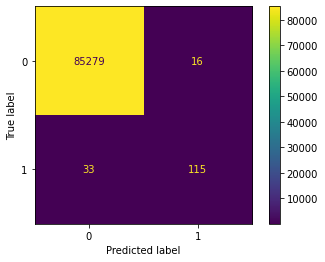

<Figure size 720x360 with 0 Axes>

In [ ]:
print(classification_report(y_test_extract,y_pred_extract_standar_SMOTE))

#f1_score =f1_score(y_test, y_pred_RandomOverSample_extract)
recall =recall_score(y_test_extract, y_pred_extract_standar_SMOTE)
precision =precision_score(y_test_extract,y_pred_extract_standar_SMOTE)

#print('f1_score =', f1_score)
print('recall =', recall)
print('precision', precision)

conf_mat =confusion_matrix(y_test_extract,y_pred_extract_standar_SMOTE)
                           
cm_display =ConfusionMatrixDisplay(confusion_matrix=conf_mat)

cm_display.plot()

plt.figure(figsize=(10,5))
plt.show

### LogesticRegression:


In [ ]:
from sklearn.linear_model import LogisticRegression

log_model =LogisticRegression()

#### Original dataset using logisticRegression:

##### evaluation using original dataset:

In [ ]:
log_model.fit(x_train, y_train)
y_pred =log_model.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.74      0.73      0.73       148

    accuracy                           1.00     85443
   macro avg       0.87      0.86      0.87     85443
weighted avg       1.00      1.00      1.00     85443

recall = 0.7297297297297297
precision 0.7397260273972602


<function matplotlib.pyplot.show(*args, **kw)>

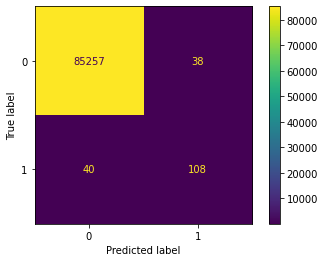

<Figure size 720x360 with 0 Axes>

In [ ]:
print(classification_report(y_test,y_pred))

#f1_score =f1_score(y_test, y_pred)
recall =recall_score(y_test, y_pred)
precision =precision_score(y_test,y_pred)

#print('f1_score =', f1_score)
print('recall =', recall)
print('precision', precision)

conf_mat =confusion_matrix(y_test,y_pred)
                           
cm_display =ConfusionMatrixDisplay(confusion_matrix=conf_mat)

cm_display.plot()

plt.figure(figsize=(10,5))
plt.show

##### evaluation using standaraized original dataset:

In [ ]:
log_model.fit(x_train_standar,y_train)
y_pred_standar =log_model.predict(x_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.00      0.00      0.00       148

    accuracy                           1.00     85443
   macro avg       0.50      0.50      0.50     85443
weighted avg       1.00      1.00      1.00     85443

f1_score = 0.7346938775510203
recall = 0.0
precision 0.0


<function matplotlib.pyplot.show(*args, **kw)>

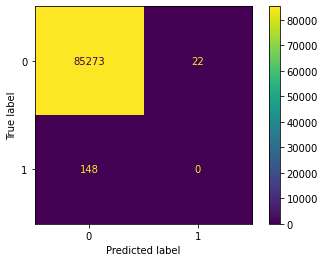

<Figure size 720x360 with 0 Axes>

In [ ]:
from sklearn.metrics import classification_report, f1_score , recall_score, precision_score, confusion_matrix, ConfusionMatrixDisplay

print(classification_report(y_test,y_pred_standar))

f1_score =f1_score(y_test, y_pred)
recall =recall_score(y_test, y_pred_standar)
precision =precision_score(y_test,y_pred_standar)

print('f1_score =', f1_score)
print('recall =', recall)
print('precision', precision)

conf_mat =confusion_matrix(y_test,y_pred_standar)
                           
cm_display =ConfusionMatrixDisplay(confusion_matrix=conf_mat)

cm_display.plot()

plt.figure(figsize=(10,5))
plt.show

#### randomOverSample dataset using logisticRegression:

##### evaluating using original randomOverSample dataset:

In [ ]:
log_model.fit(x_train_RandomOverSample, y_train_RandomOverSample)
y_pred_RandomOverSample =log_model.predict(x_test)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     85295
           1       0.04      0.91      0.08       148

    accuracy                           0.96     85443
   macro avg       0.52      0.94      0.53     85443
weighted avg       1.00      0.96      0.98     85443

recall = 0.9121621621621622
precision 0.0409711684370258


<function matplotlib.pyplot.show(*args, **kw)>

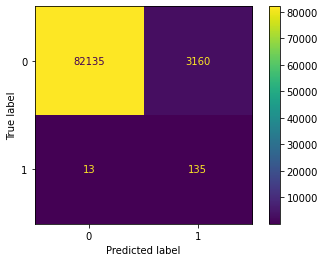

<Figure size 720x360 with 0 Axes>

In [ ]:
print(classification_report(y_test,y_pred_RandomOverSample))

#f1_score =f1_score(y_test, y_pred_RandomOverSample)
recall =recall_score(y_test, y_pred_RandomOverSample)
precision =precision_score(y_test,y_pred_RandomOverSample)

#print('f1_score =', f1_score)
print('recall =', recall)
print('precision', precision)

conf_mat =confusion_matrix(y_test,y_pred_RandomOverSample)
                           
cm_display =ConfusionMatrixDisplay(confusion_matrix=conf_mat)

cm_display.plot()

plt.figure(figsize=(10,5))
plt.show

##### evaluating using original standard randomOverSample dataset:

In [ ]:
log_model.fit(x_train_standar_RandomOverSample, y_train_standar_RandomOverSample)
y_pred_standar_RandomOverSample=log_model.predict(x_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.00      0.00      0.00       148

    accuracy                           1.00     85443
   macro avg       0.50      0.50      0.50     85443
weighted avg       1.00      1.00      1.00     85443

recall = 0.0
precision 0.0


<function matplotlib.pyplot.show(*args, **kw)>

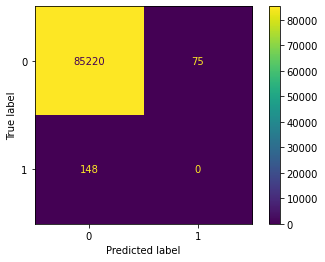

<Figure size 720x360 with 0 Axes>

In [ ]:
print(classification_report(y_test,y_pred_standar_RandomOverSample))

#f1_score =f1_score(y_test, y_pred_RandomOverSample_extract)
recall =recall_score(y_test, y_pred_standar_RandomOverSample)
precision =precision_score(y_test,y_pred_standar_RandomOverSample)

#print('f1_score =', f1_score)
print('recall =', recall)
print('precision', precision)

conf_mat =confusion_matrix(y_test,y_pred_standar_RandomOverSample)
                           
cm_display =ConfusionMatrixDisplay(confusion_matrix=conf_mat)

cm_display.plot()

plt.figure(figsize=(10,5))
plt.show

##### evaluating using extracted features randomOverSample dataset:

In [ ]:
log_model.fit(x_train_extract_RandomOverSample,y_train_RandomOverSample)
y_pred_RandomOverSample_extract=log_model.predict(x_test_exctract)

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85295
           1       0.06      0.91      0.11       148

    accuracy                           0.97     85443
   macro avg       0.53      0.94      0.55     85443
weighted avg       1.00      0.97      0.99     85443

recall = 0.9121621621621622
precision 0.058340535868625754


<function matplotlib.pyplot.show(*args, **kw)>

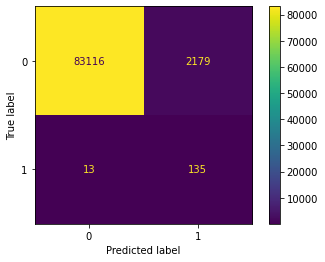

<Figure size 720x360 with 0 Axes>

In [ ]:
print(classification_report(y_test_extract,y_pred_RandomOverSample_extract))

#f1_score =f1_score(y_test, y_pred_RandomOverSample_extract)
recall =recall_score(y_test_extract, y_pred_RandomOverSample_extract)
precision =precision_score(y_test_extract,y_pred_RandomOverSample_extract)

#print('f1_score =', f1_score)
print('recall =', recall)
print('precision', precision)

conf_mat =confusion_matrix(y_test_extract,y_pred_RandomOverSample_extract)
                           
cm_display =ConfusionMatrixDisplay(confusion_matrix=conf_mat)

cm_display.plot()

plt.figure(figsize=(10,5))
plt.show

##### evaluating using standard extracted randomOverSample dataset:

In [ ]:
log_model.fit(x_train_extract_standar_RandomOverSample,y_train_standar_RandomOverSample)
y_pred_extract_standar_RandomOverSample =log_model.predict(x_test_exctract)

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     85295
           1       0.03      0.93      0.06       148

    accuracy                           0.95     85443
   macro avg       0.51      0.94      0.51     85443
weighted avg       1.00      0.95      0.97     85443

recall = 0.9256756756756757
precision 0.02903772785078423


<function matplotlib.pyplot.show(*args, **kw)>

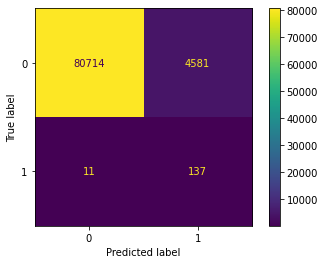

<Figure size 720x360 with 0 Axes>

In [ ]:
print(classification_report(y_test_extract,y_pred_extract_standar_RandomOverSample))

#f1_score =f1_score(y_test, y_pred_RandomOverSample_extract)
recall =recall_score(y_test_extract, y_pred_extract_standar_RandomOverSample)
precision =precision_score(y_test_extract,y_pred_extract_standar_RandomOverSample)

#print('f1_score =', f1_score)
print('recall =', recall)
print('precision', precision)

conf_mat =confusion_matrix(y_test_extract,y_pred_extract_standar_RandomOverSample)
                           
cm_display =ConfusionMatrixDisplay(confusion_matrix=conf_mat)

cm_display.plot()

plt.figure(figsize=(10,5))
plt.show

#### SMOTE dataset using logisticRegression:

##### evaluating using original SMOTE dataset:

In [ ]:
log_model.fit(x_train_SMOTE, y_train_SMOTE)
y_pred_SMOTE =log_model.predict(x_test)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.07      0.91      0.14       148

    accuracy                           0.98     85443
   macro avg       0.54      0.94      0.56     85443
weighted avg       1.00      0.98      0.99     85443

recall = 0.9054054054054054
precision 0.07486033519553073


<function matplotlib.pyplot.show(*args, **kw)>

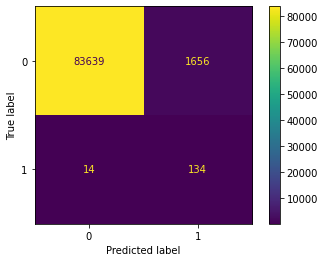

<Figure size 720x360 with 0 Axes>

In [ ]:
print(classification_report(y_test,y_pred_SMOTE))

#f1_score =f1_score(y_test, y_pred_RandomOverSample)
recall =recall_score(y_test, y_pred_SMOTE)
precision =precision_score(y_test,y_pred_SMOTE)

#print('f1_score =', f1_score)
print('recall =', recall)
print('precision', precision)

conf_mat =confusion_matrix(y_test,y_pred_SMOTE)
                           
cm_display =ConfusionMatrixDisplay(confusion_matrix=conf_mat)

cm_display.plot()

plt.figure(figsize=(10,5))
plt.show

##### evaluating using original standard randomOverSample dataset:

In [ ]:
log_model.fit(x_train_standar_SMOTE, y_train_standar_SMOTE)
y_pred_standar_SMOTE=log_model.predict(x_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.00      0.00      0.00       148

    accuracy                           1.00     85443
   macro avg       0.50      0.50      0.50     85443
weighted avg       1.00      1.00      1.00     85443

recall = 0.0
precision 0.0


<function matplotlib.pyplot.show(*args, **kw)>

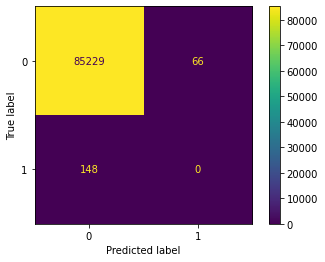

<Figure size 720x360 with 0 Axes>

In [ ]:
print(classification_report(y_test,y_pred_standar_SMOTE))

#f1_score =f1_score(y_test, y_pred_RandomOverSample_extract)
recall =recall_score(y_test, y_pred_standar_SMOTE)
precision =precision_score(y_test,y_pred_standar_SMOTE)

#print('f1_score =', f1_score)
print('recall =', recall)
print('precision', precision)

conf_mat =confusion_matrix(y_test,y_pred_standar_SMOTE)
                           
cm_display =ConfusionMatrixDisplay(confusion_matrix=conf_mat)

cm_display.plot()

plt.figure(figsize=(10,5))
plt.show

##### evaluating using extracted features randomOverSample dataset:

In [ ]:
log_model.fit(x_train_extract_SMOTE,y_train_extract_SMOTE)
y_pred_SMOTE_extract=log_model.predict(x_test_exctract)

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85295
           1       0.05      0.92      0.10       148

    accuracy                           0.97     85443
   macro avg       0.53      0.94      0.54     85443
weighted avg       1.00      0.97      0.98     85443

recall = 0.918918918918919
precision 0.05194805194805195


<function matplotlib.pyplot.show(*args, **kw)>

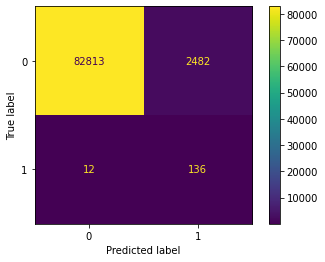

<Figure size 720x360 with 0 Axes>

In [ ]:
print(classification_report(y_test_extract,y_pred_SMOTE_extract))

#f1_score =f1_score(y_test, y_pred_RandomOverSample_extract)
recall =recall_score(y_test_extract, y_pred_SMOTE_extract)
precision =precision_score(y_test_extract,y_pred_SMOTE_extract)

#print('f1_score =', f1_score)
print('recall =', recall)
print('precision', precision)

conf_mat =confusion_matrix(y_test_extract,y_pred_SMOTE_extract)
                           
cm_display =ConfusionMatrixDisplay(confusion_matrix=conf_mat)

cm_display.plot()

plt.figure(figsize=(10,5))
plt.show

##### evaluating using standard extracted randomOverSample dataset:

In [ ]:
log_model.fit(x_train_extract_standar_SMOTE,y_train_standar_SMOTE)
y_pred_extract_standar_SMOTE =log_model.predict(x_test_exctract)

              precision    recall  f1-score   support

           0       1.00      0.94      0.97     85295
           1       0.03      0.93      0.05       148

    accuracy                           0.94     85443
   macro avg       0.51      0.93      0.51     85443
weighted avg       1.00      0.94      0.97     85443

recall = 0.9256756756756757
precision 0.025971563981042653


<function matplotlib.pyplot.show(*args, **kw)>

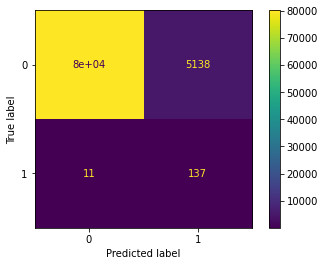

<Figure size 720x360 with 0 Axes>

In [ ]:
print(classification_report(y_test_extract,y_pred_extract_standar_SMOTE))

#f1_score =f1_score(y_test, y_pred_RandomOverSample_extract)
recall =recall_score(y_test_extract, y_pred_extract_standar_SMOTE)
precision =precision_score(y_test_extract,y_pred_extract_standar_SMOTE)

#print('f1_score =', f1_score)
print('recall =', recall)
print('precision', precision)

conf_mat =confusion_matrix(y_test_extract,y_pred_extract_standar_SMOTE)
                           
cm_display =ConfusionMatrixDisplay(confusion_matrix=conf_mat)

cm_display.plot()

plt.figure(figsize=(10,5))
plt.show

### Adaboost:


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_classifier =AdaBoostClassifier()

#### Original dataset using ada_classifier:

##### evaluation using original dataset:

In [ ]:
ada_classifier.fit(x_train, y_train)
y_pred =ada_classifier.predict(x_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.83      0.79      0.81       148

    accuracy                           1.00     85443
   macro avg       0.91      0.90      0.90     85443
weighted avg       1.00      1.00      1.00     85443

f1_score = 0.8096885813148789
recall = 0.7905405405405406
precision 0.8297872340425532


<function matplotlib.pyplot.show(*args, **kw)>

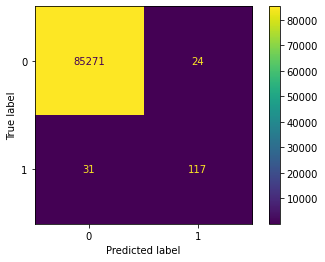

<Figure size 720x360 with 0 Axes>

In [ ]:
from sklearn.metrics import classification_report, accuracy_score ,f1_score, recall_score , precision_score, confusion_matrix, ConfusionMatrixDisplay

print(classification_report(y_test,y_pred))

f1_score =f1_score(y_test, y_pred)
recall =recall_score(y_test, y_pred)
precision =precision_score(y_test,y_pred)

print('f1_score =', f1_score)
print('recall =', recall)
print('precision', precision)

conf_mat =confusion_matrix(y_test,y_pred)
                           
cm_display =ConfusionMatrixDisplay(confusion_matrix=conf_mat)

cm_display.plot()

plt.figure(figsize=(10,5))
plt.show

##### evaluation using standaraized original dataset:

In [ ]:
ada_classifier.fit(x_train_standar,y_train)
y_pred_standar =ada_classifier.predict(x_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.82      0.81      0.81       148

    accuracy                           1.00     85443
   macro avg       0.91      0.91      0.91     85443
weighted avg       1.00      1.00      1.00     85443

f1_score = 0.8096885813148789
recall = 0.8108108108108109
precision 0.8163265306122449


<function matplotlib.pyplot.show(*args, **kw)>

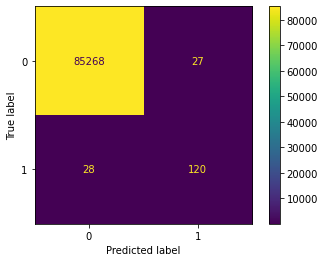

<Figure size 720x360 with 0 Axes>

In [ ]:
from sklearn.metrics import classification_report, f1_score , recall_score, precision_score, confusion_matrix, ConfusionMatrixDisplay

print(classification_report(y_test,y_pred_standar))

f1_score =f1_score(y_test, y_pred)
recall =recall_score(y_test, y_pred_standar)
precision =precision_score(y_test,y_pred_standar)

print('f1_score =', f1_score)
print('recall =', recall)
print('precision', precision)

conf_mat =confusion_matrix(y_test,y_pred_standar)
                           
cm_display =ConfusionMatrixDisplay(confusion_matrix=conf_mat)

cm_display.plot()

plt.figure(figsize=(10,5))
plt.show

#### randomOverSample dataset using ada_classifier:

##### evaluating using original randomOverSample dataset:

In [ ]:
ada_classifier.fit(x_train_RandomOverSample, y_train_RandomOverSample)
y_pred_RandomOverSample =ada_classifier.predict(x_test)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.08      0.92      0.15       148

    accuracy                           0.98     85443
   macro avg       0.54      0.95      0.57     85443
weighted avg       1.00      0.98      0.99     85443

recall = 0.918918918918919
precision 0.08436724565756824


<function matplotlib.pyplot.show(*args, **kw)>

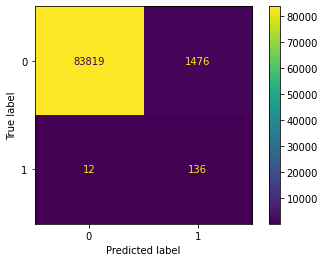

<Figure size 720x360 with 0 Axes>

In [ ]:
print(classification_report(y_test,y_pred_RandomOverSample))

#f1_score =f1_score(y_test, y_pred_RandomOverSample)
recall =recall_score(y_test, y_pred_RandomOverSample)
precision =precision_score(y_test,y_pred_RandomOverSample)

#print('f1_score =', f1_score)
print('recall =', recall)
print('precision', precision)

conf_mat =confusion_matrix(y_test,y_pred_RandomOverSample)
                           
cm_display =ConfusionMatrixDisplay(confusion_matrix=conf_mat)

cm_display.plot()

plt.figure(figsize=(10,5))
plt.show

##### evaluating using original standard randomOverSample dataset:

In [ ]:
ada_classifier.fit(x_train_standar_RandomOverSample, y_train_standar_RandomOverSample)
y_pred_standar_RandomOverSample=ada_classifier.predict(x_test)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85295
           1       0.11      0.89      0.20       148

    accuracy                           0.99     85443
   macro avg       0.55      0.94      0.59     85443
weighted avg       1.00      0.99      0.99     85443

recall = 0.8851351351351351
precision 0.11008403361344538


<function matplotlib.pyplot.show(*args, **kw)>

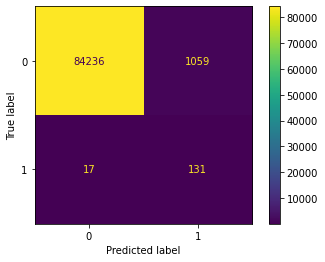

<Figure size 720x360 with 0 Axes>

In [ ]:
print(classification_report(y_test,y_pred_standar_RandomOverSample))

#f1_score =f1_score(y_test, y_pred_RandomOverSample_extract)
recall =recall_score(y_test, y_pred_standar_RandomOverSample)
precision =precision_score(y_test,y_pred_standar_RandomOverSample)

#print('f1_score =', f1_score)
print('recall =', recall)
print('precision', precision)

conf_mat =confusion_matrix(y_test,y_pred_standar_RandomOverSample)
                           
cm_display =ConfusionMatrixDisplay(confusion_matrix=conf_mat)

cm_display.plot()

plt.figure(figsize=(10,5))
plt.show

##### evaluating using extracted features randomOverSample dataset:

In [ ]:
ada_classifier.fit(x_train_extract_RandomOverSample,y_train_RandomOverSample)
y_pred_RandomOverSample_extract=ada_classifier.predict(x_test_exctract)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.07      0.92      0.13       148

    accuracy                           0.98     85443
   macro avg       0.53      0.95      0.56     85443
weighted avg       1.00      0.98      0.99     85443

recall = 0.918918918918919
precision 0.06931702344546381


<function matplotlib.pyplot.show(*args, **kw)>

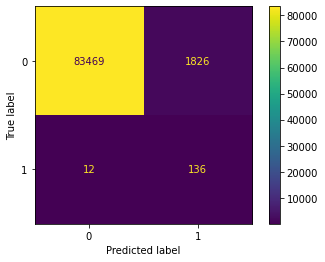

<Figure size 720x360 with 0 Axes>

In [ ]:
print(classification_report(y_test_extract,y_pred_RandomOverSample_extract))

#f1_score =f1_score(y_test, y_pred_RandomOverSample_extract)
recall =recall_score(y_test_extract, y_pred_RandomOverSample_extract)
precision =precision_score(y_test_extract,y_pred_RandomOverSample_extract)

#print('f1_score =', f1_score)
print('recall =', recall)
print('precision', precision)

conf_mat =confusion_matrix(y_test_extract,y_pred_RandomOverSample_extract)
                           
cm_display =ConfusionMatrixDisplay(confusion_matrix=conf_mat)

cm_display.plot()

plt.figure(figsize=(10,5))
plt.show

##### evaluating using standard extracted randomOverSample dataset:

In [ ]:
ada_classifier.fit(x_train_extract_standar_RandomOverSample,y_train_standar_RandomOverSample)
y_pred_extract_standar_RandomOverSample =ada_classifier.predict(x_test_exctract)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.06      0.90      0.12       148

    accuracy                           0.98     85443
   macro avg       0.53      0.94      0.55     85443
weighted avg       1.00      0.98      0.99     85443

recall = 0.8986486486486487
precision 0.06428226196230062


<function matplotlib.pyplot.show(*args, **kw)>

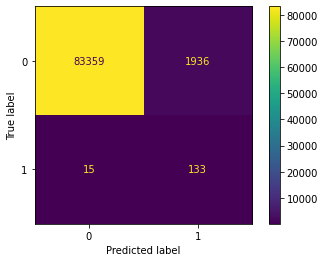

<Figure size 720x360 with 0 Axes>

In [ ]:
print(classification_report(y_test_extract,y_pred_extract_standar_RandomOverSample))

#f1_score =f1_score(y_test, y_pred_RandomOverSample_extract)
recall =recall_score(y_test_extract, y_pred_extract_standar_RandomOverSample)
precision =precision_score(y_test_extract,y_pred_extract_standar_RandomOverSample)

#print('f1_score =', f1_score)
print('recall =', recall)
print('precision', precision)

conf_mat =confusion_matrix(y_test_extract,y_pred_extract_standar_RandomOverSample)
                           
cm_display =ConfusionMatrixDisplay(confusion_matrix=conf_mat)

cm_display.plot()

plt.figure(figsize=(10,5))
plt.show

#### SMOTE dataset using ada_classifier:

##### evaluating using original SMOTE dataset:

In [ ]:
ada_classifier.fit(x_train_SMOTE, y_train_SMOTE)
y_pred_SMOTE =ada_classifier.predict(x_test)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85295
           1       0.11      0.91      0.20       148

    accuracy                           0.99     85443
   macro avg       0.56      0.95      0.60     85443
weighted avg       1.00      0.99      0.99     85443

recall = 0.9121621621621622
precision 0.1143099068585944


<function matplotlib.pyplot.show(*args, **kw)>

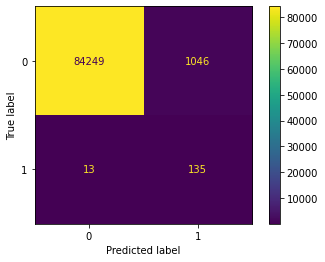

<Figure size 720x360 with 0 Axes>

In [ ]:
print(classification_report(y_test,y_pred_SMOTE))

#f1_score =f1_score(y_test, y_pred_RandomOverSample)
recall =recall_score(y_test, y_pred_SMOTE)
precision =precision_score(y_test,y_pred_SMOTE)

#print('f1_score =', f1_score)
print('recall =', recall)
print('precision', precision)

conf_mat =confusion_matrix(y_test,y_pred_SMOTE)
                           
cm_display =ConfusionMatrixDisplay(confusion_matrix=conf_mat)

cm_display.plot()

plt.figure(figsize=(10,5))
plt.show

##### evaluating using original standard randomOverSample dataset:

In [ ]:
ada_classifier.fit(x_train_standar_SMOTE, y_train_standar_SMOTE)
y_pred_standar_SMOTE=ada_classifier.predict(x_test)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     85295
           1       0.04      0.93      0.07       148

    accuracy                           0.96     85443
   macro avg       0.52      0.94      0.52     85443
weighted avg       1.00      0.96      0.98     85443

recall = 0.9256756756756757
precision 0.03682795698924731


<function matplotlib.pyplot.show(*args, **kw)>

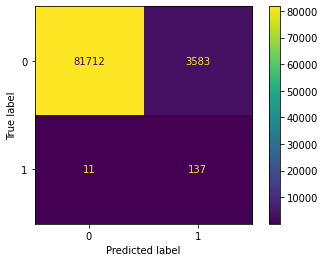

<Figure size 720x360 with 0 Axes>

In [ ]:
print(classification_report(y_test,y_pred_standar_SMOTE))

#f1_score =f1_score(y_test, y_pred_RandomOverSample_extract)
recall =recall_score(y_test, y_pred_standar_SMOTE)
precision =precision_score(y_test,y_pred_standar_SMOTE)

#print('f1_score =', f1_score)
print('recall =', recall)
print('precision', precision)

conf_mat =confusion_matrix(y_test,y_pred_standar_SMOTE)
                           
cm_display =ConfusionMatrixDisplay(confusion_matrix=conf_mat)

cm_display.plot()

plt.figure(figsize=(10,5))
plt.show

##### evaluating using extracted features randomOverSample dataset:

In [ ]:
ada_classifier.fit(x_train_extract_SMOTE,y_train_extract_SMOTE)
y_pred_SMOTE_extract=ada_classifier.predict(x_test_exctract)

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     85295
           1       0.05      0.93      0.09       148

    accuracy                           0.97     85443
   macro avg       0.52      0.95      0.54     85443
weighted avg       1.00      0.97      0.98     85443

recall = 0.9256756756756757
precision 0.04703055269481634


<function matplotlib.pyplot.show(*args, **kw)>

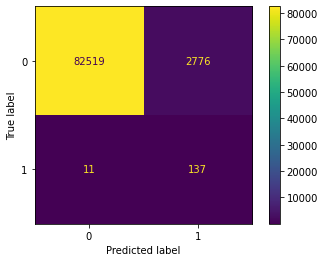

<Figure size 720x360 with 0 Axes>

In [ ]:
print(classification_report(y_test_extract,y_pred_SMOTE_extract))

#f1_score =f1_score(y_test, y_pred_RandomOverSample_extract)
recall =recall_score(y_test_extract, y_pred_SMOTE_extract)
precision =precision_score(y_test_extract,y_pred_SMOTE_extract)

#print('f1_score =', f1_score)
print('recall =', recall)
print('precision', precision)

conf_mat =confusion_matrix(y_test_extract,y_pred_SMOTE_extract)
                           
cm_display =ConfusionMatrixDisplay(confusion_matrix=conf_mat)

cm_display.plot()

plt.figure(figsize=(10,5))
plt.show

##### evaluating using standard extracted randomOverSample dataset:

In [ ]:
ada_classifier.fit(x_train_extract_standar_SMOTE,y_train_standar_SMOTE)
y_pred_extract_standar_SMOTE =ada_classifier.predict(x_test_exctract)

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     85295
           1       0.05      0.92      0.09       148

    accuracy                           0.97     85443
   macro avg       0.52      0.94      0.54     85443
weighted avg       1.00      0.97      0.98     85443

recall = 0.918918918918919
precision 0.046039268788083954


<function matplotlib.pyplot.show(*args, **kw)>

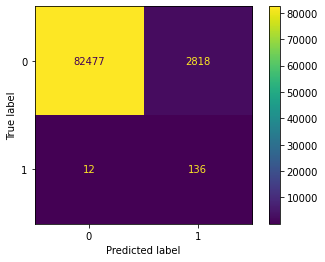

<Figure size 720x360 with 0 Axes>

In [ ]:
print(classification_report(y_test_extract,y_pred_extract_standar_SMOTE))

#f1_score =f1_score(y_test, y_pred_RandomOverSample_extract)
recall =recall_score(y_test_extract, y_pred_extract_standar_SMOTE)
precision =precision_score(y_test_extract,y_pred_extract_standar_SMOTE)

#print('f1_score =', f1_score)
print('recall =', recall)
print('precision', precision)

conf_mat =confusion_matrix(y_test_extract,y_pred_extract_standar_SMOTE)
                           
cm_display =ConfusionMatrixDisplay(confusion_matrix=conf_mat)

cm_display.plot()

plt.figure(figsize=(10,5))
plt.show

In [ ]:
ada_classifier.fit(x_train_extract_standar_SMOTE,y_train_standar_SMOTE)
y_pred_extract_standar_SMOTE =ada_classifier.predict(x_test_exctract)

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     85295
           1       0.05      0.92      0.09       148

    accuracy                           0.97     85443
   macro avg       0.52      0.94      0.54     85443
weighted avg       1.00      0.97      0.98     85443

recall = 0.918918918918919
precision 0.046039268788083954


<function matplotlib.pyplot.show(*args, **kw)>

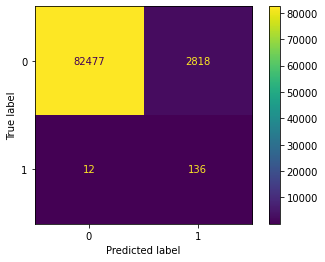

<Figure size 720x360 with 0 Axes>

In [ ]:
print(classification_report(y_test_extract,y_pred_extract_standar_SMOTE))

#f1_score =f1_score(y_test, y_pred_RandomOverSample_extract)
recall =recall_score(y_test_extract, y_pred_extract_standar_SMOTE)
precision =precision_score(y_test_extract,y_pred_extract_standar_SMOTE)

#print('f1_score =', f1_score)
print('recall =', recall)
print('precision', precision)

conf_mat =confusion_matrix(y_test_extract,y_pred_extract_standar_SMOTE)
                           
cm_display =ConfusionMatrixDisplay(confusion_matrix=conf_mat)

cm_display.plot()

plt.figure(figsize=(10,5))
plt.show

### Xgboost:


In [ ]:
from xgboost import XGBClassifier

xgb_classifier =XGBClassifier()

#### Original dataset using xgb_classifier:

##### evaluation using original dataset:

In [ ]:
xgb_classifier.fit(x_train, y_train)
y_pred =xgb_classifier.predict(x_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.92      0.83      0.88       148

    accuracy                           1.00     85443
   macro avg       0.96      0.92      0.94     85443
weighted avg       1.00      1.00      1.00     85443

f1_score = 0.8754448398576512
recall = 0.831081081081081
precision 0.924812030075188


<function matplotlib.pyplot.show(*args, **kw)>

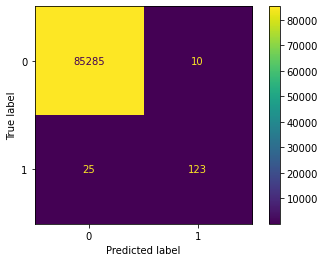

<Figure size 720x360 with 0 Axes>

In [ ]:
from sklearn.metrics import classification_report, accuracy_score ,f1_score, recall_score , precision_score, confusion_matrix, ConfusionMatrixDisplay

print(classification_report(y_test,y_pred))

f1_score =f1_score(y_test, y_pred)
recall =recall_score(y_test, y_pred)
precision =precision_score(y_test,y_pred)

print('f1_score =', f1_score)
print('recall =', recall)
print('precision', precision)

conf_mat =confusion_matrix(y_test,y_pred)
                           
cm_display =ConfusionMatrixDisplay(confusion_matrix=conf_mat)

cm_display.plot()

plt.figure(figsize=(10,5))
plt.show

##### evaluation using standaraized original dataset:

In [ ]:
xgb_classifier.fit(x_train_standar,y_train)
y_pred_standar =xgb_classifier.predict(x_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.89      0.84      0.87       148

    accuracy                           1.00     85443
   macro avg       0.94      0.92      0.93     85443
weighted avg       1.00      1.00      1.00     85443

f1_score = 0.8754448398576512
recall = 0.8445945945945946
precision 0.8865248226950354


<function matplotlib.pyplot.show(*args, **kw)>

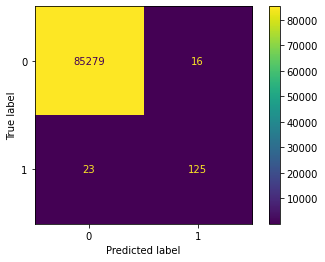

<Figure size 720x360 with 0 Axes>

In [ ]:
from sklearn.metrics import classification_report, f1_score , recall_score, precision_score, confusion_matrix, ConfusionMatrixDisplay

print(classification_report(y_test,y_pred_standar))

f1_score =f1_score(y_test, y_pred)
recall =recall_score(y_test, y_pred_standar)
precision =precision_score(y_test,y_pred_standar)

print('f1_score =', f1_score)
print('recall =', recall)
print('precision', precision)

conf_mat =confusion_matrix(y_test,y_pred_standar)
                           
cm_display =ConfusionMatrixDisplay(confusion_matrix=conf_mat)

cm_display.plot()

plt.figure(figsize=(10,5))
plt.show

#### randomOverSample dataset using xgb_classifier:

##### evaluating using original randomOverSample dataset:

In [ ]:
xgb_classifier.fit(x_train_RandomOverSample, y_train_RandomOverSample)
y_pred_RandomOverSample =xgb_classifier.predict(x_test)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85295
           1       0.22      0.90      0.35       148

    accuracy                           0.99     85443
   macro avg       0.61      0.95      0.67     85443
weighted avg       1.00      0.99      1.00     85443

recall = 0.8986486486486487
precision 0.2169657422512235


<function matplotlib.pyplot.show(*args, **kw)>

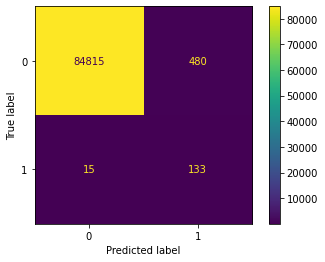

<Figure size 720x360 with 0 Axes>

In [ ]:
print(classification_report(y_test,y_pred_RandomOverSample))

#f1_score =f1_score(y_test, y_pred_RandomOverSample)
recall =recall_score(y_test, y_pred_RandomOverSample)
precision =precision_score(y_test,y_pred_RandomOverSample)

#print('f1_score =', f1_score)
print('recall =', recall)
print('precision', precision)

conf_mat =confusion_matrix(y_test,y_pred_RandomOverSample)
                           
cm_display =ConfusionMatrixDisplay(confusion_matrix=conf_mat)

cm_display.plot()

plt.figure(figsize=(10,5))
plt.show

##### evaluating using original standard randomOverSample dataset:

In [ ]:
xgb_classifier.fit(x_train_standar_RandomOverSample, y_train_standar_RandomOverSample)
y_pred_standar_RandomOverSample=xgb_classifier.predict(x_test)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85295
           1       0.21      0.89      0.34       148

    accuracy                           0.99     85443
   macro avg       0.61      0.94      0.67     85443
weighted avg       1.00      0.99      1.00     85443

recall = 0.8918918918918919
precision 0.21359223300970873


<function matplotlib.pyplot.show(*args, **kw)>

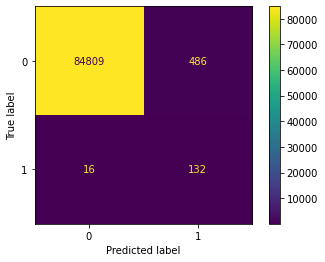

<Figure size 720x360 with 0 Axes>

In [ ]:
print(classification_report(y_test,y_pred_standar_RandomOverSample))

#f1_score =f1_score(y_test, y_pred_RandomOverSample_extract)
recall =recall_score(y_test, y_pred_standar_RandomOverSample)
precision =precision_score(y_test,y_pred_standar_RandomOverSample)

#print('f1_score =', f1_score)
print('recall =', recall)
print('precision', precision)

conf_mat =confusion_matrix(y_test,y_pred_standar_RandomOverSample)
                           
cm_display =ConfusionMatrixDisplay(confusion_matrix=conf_mat)

cm_display.plot()

plt.figure(figsize=(10,5))
plt.show

##### evaluating using extracted features randomOverSample dataset:

In [ ]:
xgb_classifier.fit(x_train_extract_RandomOverSample,y_train_RandomOverSample)
y_pred_RandomOverSample_extract=xgb_classifier.predict(x_test_exctract)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85295
           1       0.16      0.91      0.27       148

    accuracy                           0.99     85443
   macro avg       0.58      0.95      0.63     85443
weighted avg       1.00      0.99      0.99     85443

recall = 0.9054054054054054
precision 0.1606714628297362


<function matplotlib.pyplot.show(*args, **kw)>

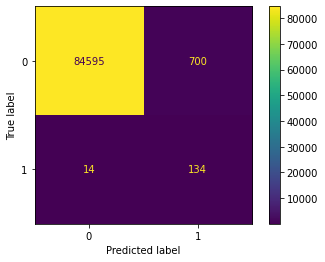

<Figure size 720x360 with 0 Axes>

In [ ]:
print(classification_report(y_test_extract,y_pred_RandomOverSample_extract))

#f1_score =f1_score(y_test, y_pred_RandomOverSample_extract)
recall =recall_score(y_test_extract, y_pred_RandomOverSample_extract)
precision =precision_score(y_test_extract,y_pred_RandomOverSample_extract)

#print('f1_score =', f1_score)
print('recall =', recall)
print('precision', precision)

conf_mat =confusion_matrix(y_test_extract,y_pred_RandomOverSample_extract)
                           
cm_display =ConfusionMatrixDisplay(confusion_matrix=conf_mat)

cm_display.plot()

plt.figure(figsize=(10,5))
plt.show

##### evaluating using standard extracted randomOverSample dataset:

In [ ]:
xgb_classifier.fit(x_train_extract_standar_RandomOverSample,y_train_standar_RandomOverSample)
y_pred_extract_standar_RandomOverSample =xgb_classifier.predict(x_test_exctract)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85295
           1       0.12      0.91      0.21       148

    accuracy                           0.99     85443
   macro avg       0.56      0.95      0.60     85443
weighted avg       1.00      0.99      0.99     85443

recall = 0.9054054054054054
precision 0.11642050390964379


<function matplotlib.pyplot.show(*args, **kw)>

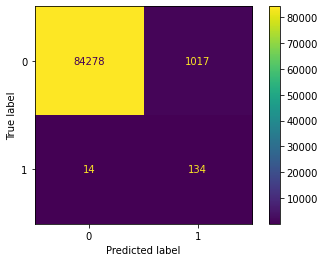

<Figure size 720x360 with 0 Axes>

In [ ]:
print(classification_report(y_test_extract,y_pred_extract_standar_RandomOverSample))

#f1_score =f1_score(y_test, y_pred_RandomOverSample_extract)
recall =recall_score(y_test_extract, y_pred_extract_standar_RandomOverSample)
precision =precision_score(y_test_extract,y_pred_extract_standar_RandomOverSample)

#print('f1_score =', f1_score)
print('recall =', recall)
print('precision', precision)

conf_mat =confusion_matrix(y_test_extract,y_pred_extract_standar_RandomOverSample)
                           
cm_display =ConfusionMatrixDisplay(confusion_matrix=conf_mat)

cm_display.plot()

plt.figure(figsize=(10,5))
plt.show

#### SMOTE dataset using xgb_classifier:

##### evaluating using original SMOTE dataset:

In [ ]:
xgb_classifier.fit(x_train_SMOTE, y_train_SMOTE)
y_pred_SMOTE =xgb_classifier.predict(x_test)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85295
           1       0.21      0.90      0.34       148

    accuracy                           0.99     85443
   macro avg       0.60      0.95      0.67     85443
weighted avg       1.00      0.99      1.00     85443

recall = 0.8986486486486487
precision 0.21011058451816747


<function matplotlib.pyplot.show(*args, **kw)>

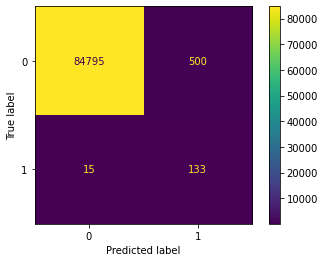

<Figure size 720x360 with 0 Axes>

In [ ]:
print(classification_report(y_test,y_pred_SMOTE))

#f1_score =f1_score(y_test, y_pred_RandomOverSample)
recall =recall_score(y_test, y_pred_SMOTE)
precision =precision_score(y_test,y_pred_SMOTE)

#print('f1_score =', f1_score)
print('recall =', recall)
print('precision', precision)

conf_mat =confusion_matrix(y_test,y_pred_SMOTE)
                           
cm_display =ConfusionMatrixDisplay(confusion_matrix=conf_mat)

cm_display.plot()

plt.figure(figsize=(10,5))
plt.show

##### evaluating using original standard randomOverSample dataset:

In [ ]:
xgb_classifier.fit(x_train_standar_SMOTE, y_train_standar_SMOTE)
y_pred_standar_SMOTE=xgb_classifier.predict(x_test)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85295
           1       0.13      0.91      0.23       148

    accuracy                           0.99     85443
   macro avg       0.56      0.95      0.61     85443
weighted avg       1.00      0.99      0.99     85443

recall = 0.9054054054054054
precision 0.1287223823246878


<function matplotlib.pyplot.show(*args, **kw)>

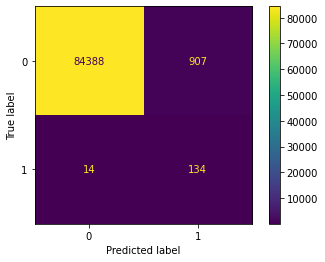

<Figure size 720x360 with 0 Axes>

In [ ]:
print(classification_report(y_test,y_pred_standar_SMOTE))

#f1_score =f1_score(y_test, y_pred_RandomOverSample_extract)
recall =recall_score(y_test, y_pred_standar_SMOTE)
precision =precision_score(y_test,y_pred_standar_SMOTE)

#print('f1_score =', f1_score)
print('recall =', recall)
print('precision', precision)

conf_mat =confusion_matrix(y_test,y_pred_standar_SMOTE)
                           
cm_display =ConfusionMatrixDisplay(confusion_matrix=conf_mat)

cm_display.plot()

plt.figure(figsize=(10,5))
plt.show

##### evaluating using extracted features randomOverSample dataset:

In [ ]:
xgb_classifier.fit(x_train_extract_SMOTE,y_train_extract_SMOTE)
y_pred_SMOTE_extract=xgb_classifier.predict(x_test_exctract)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.09      0.93      0.17       148

    accuracy                           0.98     85443
   macro avg       0.55      0.96      0.58     85443
weighted avg       1.00      0.98      0.99     85443

recall = 0.9256756756756757
precision 0.09461325966850828


<function matplotlib.pyplot.show(*args, **kw)>

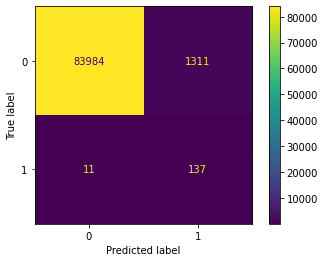

<Figure size 720x360 with 0 Axes>

In [ ]:
print(classification_report(y_test_extract,y_pred_SMOTE_extract))

#f1_score =f1_score(y_test, y_pred_RandomOverSample_extract)
recall =recall_score(y_test_extract, y_pred_SMOTE_extract)
precision =precision_score(y_test_extract,y_pred_SMOTE_extract)

#print('f1_score =', f1_score)
print('recall =', recall)
print('precision', precision)

conf_mat =confusion_matrix(y_test_extract,y_pred_SMOTE_extract)
                           
cm_display =ConfusionMatrixDisplay(confusion_matrix=conf_mat)

cm_display.plot()

plt.figure(figsize=(10,5))
plt.show

##### evaluating using standard extracted randomOverSample dataset:

In [ ]:
xgb_classifier.fit(x_train_extract_standar_SMOTE,y_train_standar_SMOTE)
y_pred_extract_standar_SMOTE =xgb_classifier.predict(x_test_exctract)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.08      0.92      0.16       148

    accuracy                           0.98     85443
   macro avg       0.54      0.95      0.57     85443
weighted avg       1.00      0.98      0.99     85443

recall = 0.918918918918919
precision 0.08494690818238601


<function matplotlib.pyplot.show(*args, **kw)>

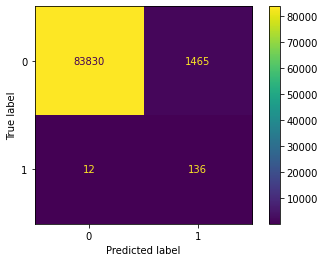

<Figure size 720x360 with 0 Axes>

In [ ]:
print(classification_report(y_test_extract,y_pred_extract_standar_SMOTE))

#f1_score =f1_score(y_test, y_pred_RandomOverSample_extract)
recall =recall_score(y_test_extract, y_pred_extract_standar_SMOTE)
precision =precision_score(y_test_extract,y_pred_extract_standar_SMOTE)

#print('f1_score =', f1_score)
print('recall =', recall)
print('precision', precision)

conf_mat =confusion_matrix(y_test_extract,y_pred_extract_standar_SMOTE)
                           
cm_display =ConfusionMatrixDisplay(confusion_matrix=conf_mat)

cm_display.plot()

plt.figure(figsize=(10,5))
plt.show

### parameter Hypertuning:

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier =AdaBoostClassifier()

In [ ]:
model =AdaBoostClassifier

In [ ]:
ada_classifier=model()

AdaBoostClassifier()

In [ ]:
from xgboost import XGBClassifier
xgb_classifier =XGBClassifier()

##### randomizedSearchCv for adaboost:

In [ ]:
params_ada={
    'n_estimators'     :[50, 60, 70, 80, 90, 100],
    'learning_rate'    :[0.5, 0.8, 1, 1.5, 2, 2.5, 3],
    'algorithm'        :['SAMME', 'SAMME.R']
    }


params_ada_new_2={
    'n_estimators'     :[100, 120, 140, 160, 180, 200 ],
    'learning_rate'    :[0.4, 0.6, 0.8, 1, 1.4, ,1.8, 2],
    'algorithm'        :['SAMME', 'SAMME.R']
    }    

SyntaxError: ignored

In [ ]:
params_ada_new_2={
    'n_estimators'     :[50, 70 ,90 ,100, 120, 150, 170, 200 ],
    'learning_rate'    :[0.50, 0.70,0.8, 0.85, 0.9,0.95, 1],
    'algorithm'        :['SAMME', 'SAMME.R']
    }   

In [ ]:
recall = make_scorer(recall_score)

In [ ]:
#random_search_ada=RandomizedSearchCV(ada_classifier,param_distributions=params_ada,n_iter=5, scoring='recall',n_jobs=-1,cv=5,verbose=3)

# random_search_ada_new=RandomizedSearchCV(ada_classifier,param_distributions=params_ada ,scoring='recall',n_jobs=-1)

random_search_ada_new_2=RandomizedSearchCV(ada_classifier,param_distributions=params_ada_new_2 ,scoring='roc_auc',n_jobs=-1)

In [ ]:
random_search_ada.fit(x_train_extract_standar_SMOTE,y_train_standar_SMOTE)
# Fitting 5 folds for each of 5 candidates, totalling 25 fits
# RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(), n_iter=5, n_jobs=-1,
#                    param_distributions={'algorithm': ['SAMME', 'SAMME.R'],
#                                         'learning_rate': [0.5, 0.8, 1, 1.5, 2,
#                                                           2.5, 3],
#                                         'n_estimators': [50, 60, 70, 80, 90,
#                                                          100]},
#                    scoring='recall', verbose=3)




In [ ]:
random_search_ada.best_estimator_
 #AdaBoostClassifier(learning_rate=1, n_estimators=70)

In [ ]:
random_search_ada.best_score_
#0.9415586373228821

In [ ]:
random_search_ada.best_params_
#{'n_estimators': 70, 'learning_rate': 1, 'algorithm': 'SAMME.R'}

In [ ]:
random_search_ada_new.fit(x_train_extract_standar_SMOTE,y_train_standar_SMOTE)

In [ ]:
random_search_ada_new.best_estimator_
#AdaBoostClassifier(learning_rate=1, n_estimators=100)

In [ ]:
random_search_ada_new.best_score_
#0.9440106521957592

In [ ]:
random_search_ada_new.best_params_
#{'n_estimators': 100, 'learning_rate': 1, 'algorithm': 'SAMME.R'}

In [ ]:
#############################################################3

In [ ]:
random_search_ada_new_2.fit(x_train_extract_standar_SMOTE,y_train_standar_SMOTE)

In [ ]:
random_search_ada_new_2.best_estimator_

In [ ]:
random_search_ada_new_2.best_score_

In [ ]:
random_search_ada_new_2.best_params_

In [ ]:
##########################################################

In [ ]:
random_search_ada_new_2.fit(x_train_extract_standar_SMOTE,y_train_standar_SMOTE)

In [ ]:
random_search_ada_new_2.best_estimator_

In [ ]:
random_search_ada_new_2.best_score_

In [ ]:
random_search_ada_new_2.best_params_

##### randomizedSearchCv for xgbboost:

In [ ]:
# Hyper Parameter Optimization
params_xgb ={
    'learning_rate'    :[0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 1] ,
    'max_depth'        :[3, 4, 5, 6, 8, 10, 12, 15],
    'min_child_weight' :[1, 3, 5, 7],
    'gamma'            :[0.0, 0.1, 0.2, 0.3, 0.4],
    'colsample_bytree' :[0.3, 0.4, 0.5, 0.7]
}

In [ ]:
# random_search_xgb=RandomizedSearchCV(xgb_classifier,param_distributions=params_xgb,n_iter=10, scoring='recall',n_jobs=-1,cv=5,verbose=3)

random_search_xgb_new=RandomizedSearchCV(xgb_classifier,param_distributions=params_xgb, scoring='recall',n_jobs=-1,refit=True)

In [ ]:
random_search_xgb.fit(x_train_extract_SMOTE,y_train_extract_SMOTE)

In [ ]:
random_search_xgb.best_estimator_

In [ ]:
random_search_xgb.best_params_

In [ ]:
random_search_xgb.best_score_

In [ ]:
random_search_xgb_new.fit(x_train_extract_SMOTE,y_train_extract_SMOTE)

In [ ]:
random_search_xgb_new.best_estimator_

In [ ]:
random_search_xgb_new.best_params_

In [ ]:
random_search_xgb_new.best_score_

In [ ]:
random_search_xgb_new.best_estimator_

In [ ]:
random_search_xgb_new.best_params_

In [ ]:
random_search_xgb_new.best_score_

## hyper parameter apply:

##### evaluating using standard extracted randomOverSample dataset:

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier_hyper=AdaBoostClassifier(algorithm='SAMME', learning_rate=0.8)
ada_classifier =AdaBoostClassifier()

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier_hyper=AdaBoostClassifier(algorithm ='SAMME.R', learning_rate= 1.2000000000000002, n_estimators= 110)

In [ ]:
ada_classifier_hyper.fit(x_train_extract_standar_SMOTE,y_train_standar_SMOTE)
y_pred_extract_standar_SMOTE =ada_classifier_hyper.predict(x_test_exctract)

In [ ]:
from sklearn.metrics import make_scorer,classification_report, accuracy_score ,f1_score, recall_score , precision_score, confusion_matrix, ConfusionMatrixDisplay
print(classification_report(y_test_extract,y_pred_extract_standar_SMOTE))

#f1_score =f1_score(y_test, y_pred_RandomOverSample_extract)
recall =recall_score(y_test_extract, y_pred_extract_standar_SMOTE)
precision =precision_score(y_test_extract,y_pred_extract_standar_SMOTE)

#print('f1_score =', f1_score)
print('recall =', recall)
print('precision', precision)

conf_mat =confusion_matrix(y_test_extract,y_pred_extract_standar_SMOTE)
                           
cm_display =ConfusionMatrixDisplay(confusion_matrix=conf_mat)

cm_display.plot()

plt.figure(figsize=(10,5))
plt.show

##### evaluating using extracted features randomOverSample dataset:

In [ ]:
from xgboost import XGBClassifier
xgb_classifier_hyper =XGBClassifier(colsample_bytree=0.4, gamma=0.3, learning_rate=0.2, max_depth=10)
xgb_classifier_hyper=XGBClassifier(colsample_bytree=0.7, gamma=0.1, learning_rate=0.25, max_depth=12)


In [ ]:
xgb_classifier_hyper=XGBClassifier(colsample_bytree=0.7, gamma=0.1, learning_rate=0.25, max_depth=12)

In [ ]:
xgb_classifier_hyper=XGBClassifier(colsample_bytree=0.7, gamma=0.1, max_depth=12)

In [ ]:
xgb_classifier_hyper=XGBClassifier(colsample_bytree=0.7, gamma=0.4, learning_rate=0.3, max_depth=6,
              min_child_weight=5)

In [ ]:
xgb_classifier_hyper.fit(x_train_extract_SMOTE,y_train_extract_SMOTE)
y_pred_SMOTE_extract=xgb_classifier_hyper.predict(x_test_exctract)

In [ ]:
from sklearn.metrics import make_scorer,classification_report, accuracy_score ,f1_score, recall_score , precision_score, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
print(classification_report(y_test_extract,y_pred_SMOTE_extract))

# f1_score =f1_score(y_test, y_pred_SMOTE_extract)
recall =recall_score(y_test_extract, y_pred_SMOTE_extract)
precision =precision_score(y_test_extract,y_pred_SMOTE_extract)

# print('f1_score =', f1_score)
print('recall =', recall)
print('precision', precision)

conf_mat =confusion_matrix(y_test_extract,y_pred_SMOTE_extract)
                           
cm_display =ConfusionMatrixDisplay(confusion_matrix=conf_mat)

cm_display.plot()

plt.figure(figsize=(10,5))
plt.show

## HyperParameter Tuning using GridSearchCV:

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier_hyper=AdaBoostClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV

params_ada={
    'n_estimators'     :np.arange(50,120,10),
    'learning_rate'    :np.arange(0.4,1.4,0.2),
    'algorithm'        :['SAMME', 'SAMME.R']
    }


params_ada_new={
    'n_estimators'     :np.arange(110,130,10),
    'learning_rate'    :np.arange(1.2,1.6,0.2),
    'algorithm'        :['SAMME.R']
    }    

In [ ]:
###################################################################(params_ada_new)=>Begin

In [ ]:
from sklearn.model_selection import GridSearchCV
ada_classifier_hyper_new=AdaBoostClassifier()
params_ada_new={
    'n_estimators'     :[50,70,100],
    'learning_rate'    :[1,1.2],
    'algorithm'        :['SAMME.R']
    }    

ada_grid_new =GridSearchCV(estimator=ada_classifier_hyper_new,scoring='recall', param_grid=params_ada_new, cv=ps)
ada_grid_new.fit(merged_x,merged_y)
print('the best parameters are %s with a score of %0.05f'
% (ada_grid_new.best_params_, ada_grid_new.best_score_))

the best parameters are {'algorithm': 'SAMME.R', 'learning_rate': 1, 'n_estimators': 70} with a score of 0.92568


In [ ]:
ada_grid_new.best_estimator_

AdaBoostClassifier(learning_rate=1, n_estimators=70)

In [ ]:
################################################################(params_ada_new)=>End

In [ ]:
ada_grid =GridSearchCV(estimator=ada_classifier_hyper, param_grid=params_ada, cv=5)

In [ ]:
ada_grid.fit(x_train_extract_standar_SMOTE,y_train_standar_SMOTE)

In [ ]:
print('the best parameters are %s with a score of %0.05f'
% (ada_grid.best_params_, ada_grid.best_score_))

In [ ]:
ada_grid.best_estimator_

In [ ]:
ada_grid_results =pd.concat([pd.DataFrame(ada_grid.cv_results_['params']),pd.DataFrame(ada_grid.cv_results['mean_test_score'],columns=['Accuracy'])],axis=1)

In [ ]:
ada_grid_results.sort_values(by=['Accuracy'])

In [ ]:
print(ada_grid_results['Accuracy']).max()

In [ ]:
ada_grid_contour =ada_grid_results.groupby(['algorithm' ,'n_estimators','learning_rate']).mean()
ada_grid_contour

In [ ]:
print(ada_grid_contour['Accuracy']).max()

In [ ]:
ada_grid_contour.sort_values(by=['Accuracy'])

In [ ]:
ada_grid_contour_reset =ada_grid_contour.reset_index()
ada_grid_contour_reset.columns =['algorithm' ,'n_estimators','learning_rate','Accuracy']
grid_pivot =ada_grid_contour_reset.pivot('algorithm' ,'n_estimators','learning_rate')
grid_pivot

In [ ]:
########################################################################################

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier_hyper=ada_grid_new.best_estimator_
# ada_classifier_hyper=AdaBoostClassifier()

In [ ]:
ada_classifier_hyper.fit(x_train_extract_standar_SMOTE,y_train_standar_SMOTE)
y_pred_extract_standar_SMOTE =ada_classifier_hyper.predict(x_test_exctract)

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     85295
           1       0.05      0.93      0.09       148

    accuracy                           0.97     85443
   macro avg       0.52      0.95      0.54     85443
weighted avg       1.00      0.97      0.98     85443

f1_score = 0.09380349195481001
recall = 0.9256756756756757
precision 0.04940497655968266


<function matplotlib.pyplot.show(*args, **kw)>

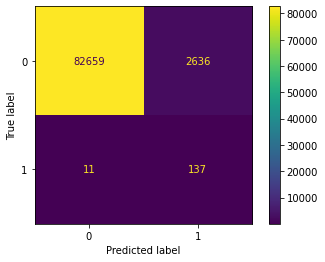

<Figure size 720x360 with 0 Axes>

In [ ]:
from sklearn.metrics import make_scorer,classification_report, accuracy_score ,f1_score, recall_score , precision_score, confusion_matrix, ConfusionMatrixDisplay
print(classification_report(y_test_extract,y_pred_extract_standar_SMOTE))

f1_score =f1_score(y_test_extract, y_pred_extract_standar_SMOTE)
recall =recall_score(y_test_extract, y_pred_extract_standar_SMOTE)
precision =precision_score(y_test_extract,y_pred_extract_standar_SMOTE)

print('f1_score =', f1_score)
print('recall =', recall)
print('precision', precision)

conf_mat =confusion_matrix(y_test_extract,y_pred_extract_standar_SMOTE)
                           
cm_display =ConfusionMatrixDisplay(confusion_matrix=conf_mat)

cm_display.plot()

plt.figure(figsize=(10,5))
plt.show

# TRY:

In [ ]:
def GridSearch_ON_SMOTE(model_name,params,x_train,y_train,x_test,y_test):
  model =model_name()
  
 

In [ ]:
from sklearn.model_selection import PredefinedSplit

In [ ]:
x_train_extract_standar_SMOTE.shape

(398040, 13)

In [ ]:
x_test_exctract.shape

(85443, 13)

In [ ]:
merged_x.shape


(483483, 13)

In [ ]:
x_split =np.zeros((483483,1),dtype=int)

In [ ]:
x_split =[-1 if i<398040 else 0 for i,x in enumerate(x_split)]

In [ ]:
merged_y=np.concatenate((y_train_extract_standar_SMOTE ,y_test))

In [ ]:
merged_x =np.concatenate((x_train_extract_standar_SMOTE ,x_test_exctract))

In [ ]:
arr

In [ ]:
ps = PredefinedSplit(test_fold=x_split)

scores=cross_val_score(xg_model,merged_x,merged_y,scoring='recall',cv=ps,n_jobs=-1)

In [ ]:
scores

array([0.91891892])

In [ ]:
xg_model =XGBClassifier()
from numpy import mean
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from xgboost import XGBClassifier


In [ ]:
cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
scores=cross_val_score(xg_model,x_train_extract_standar_SMOTE,y_train_standar_SMOTE,scoring='recall',cv=cv,n_jobs=-1)

KeyboardInterrupt: ignored

In [ ]:
print('Recall: %.5f' %mean(scores))

NameError: ignored